In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
import time

# Loading the data

In [2]:
# the MNIST dataset is part of the keras package, so we can load it directly from there:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Inspecting the data

In [3]:
# How much data do we have? 
print("Training Set Images:", len(y_train))
print("Testing Set Images:", len(X_test))

Training Set Images: 60000
Testing Set Images: 10000


In [4]:
# What does the data look like? => each image is stored as 28 arrays of length 28 (28x28 image)
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
# What does the dependent (target) variable look like?
# a single number representing the class. 0-9
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
# how many training observations?
y_train.shape

(60000,)

In [7]:
# in what format are our training input features?
X_train.shape

(60000, 28, 28)

In [8]:
# How many pixels per image?
X_train[0].shape

(28, 28)

In [9]:
# 28x28. this means our total amount of pixels is:
total_pixels = X_train[0].shape[0] * X_train[0].shape[1]
total_pixels

784

In [10]:
# How are colors represented? => HEX from 0 to 255
np.unique(X_train[0])

array([  0,   1,   2,   3,   9,  11,  14,  16,  18,  23,  24,  25,  26,
        27,  30,  35,  36,  39,  43,  45,  46,  49,  55,  56,  64,  66,
        70,  78,  80,  81,  82,  90,  93,  94, 107, 108, 114, 119, 126,
       127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166,
       170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205,
       207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244,
       247, 249, 250, 251, 252, 253, 255], dtype=uint8)

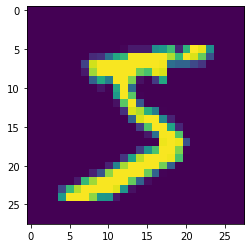

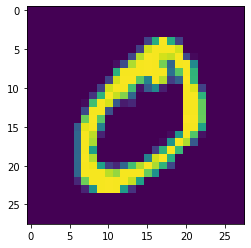

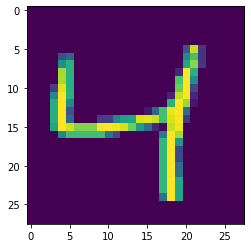

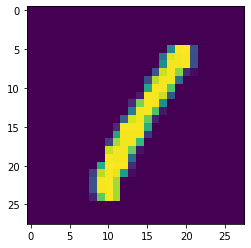

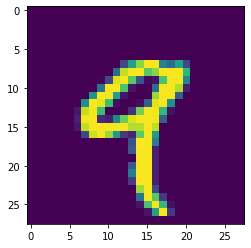

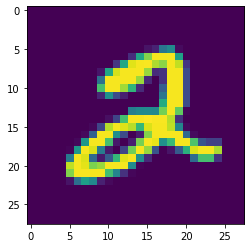

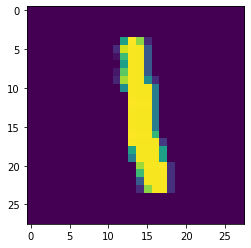

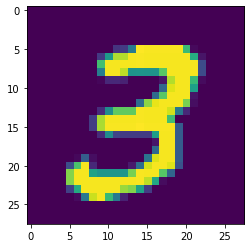

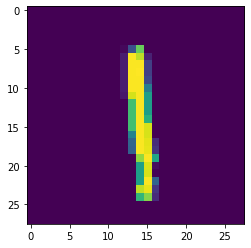

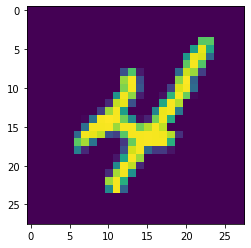

In [11]:
# They are arrays of pixels. 0 is a white pixel, 1 a black one.
# Let's visualize the first 10:

for i in range (10):
    plt.figure()
    plt.imshow(X_train[i])
    plt.show()

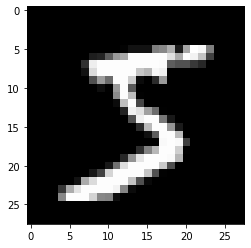

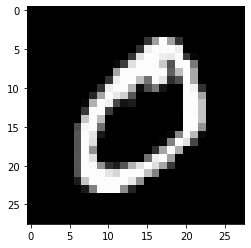

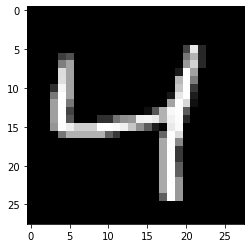

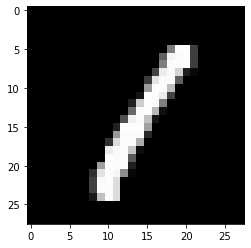

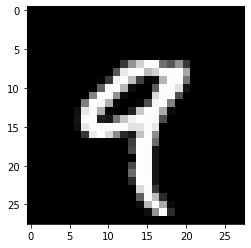

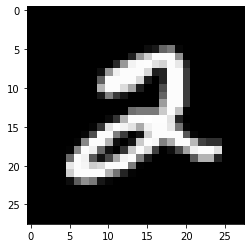

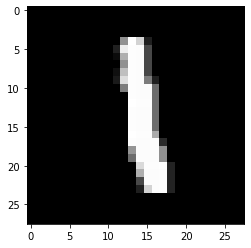

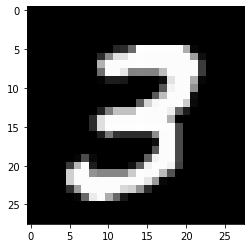

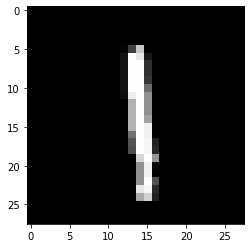

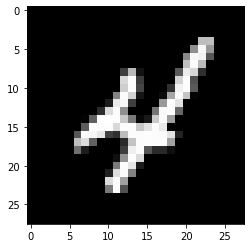

In [12]:
# Maybe color doesn't matter so much when looking at digits...
for i in range (10):
    plt.figure()
    plt.imshow(X_train[i], cmap='gist_gray')
    plt.show()

In [13]:
# right now our training data is made of 28x28 matrices.
# Let's reshape it into one vertical 784x1 vector to feed it into a simple NN
X_train = X_train.reshape((X_train.shape[0], total_pixels)).astype('float')
X_test = X_test.reshape((X_test.shape[0], total_pixels)).astype('float')

In [14]:
# Let's inspect the result (used to be 6000, 28, 28)
X_train.shape

(60000, 784)

In [15]:
# recall our X_train cells have numbers ranging from 1 to 255, corresponding to color
# it is a lot more helpful to have those from 0 to 1. Let's fix that by normalizing them
X_train = X_train / 255
X_test = X_test / 255

In [16]:
# checking a random pixel in the center
X_train[200][202]

0.0

In [17]:
# also, recall our target variable y ranges from 0 to 9.
# So we need to create 10 binary categories.
# for example, a 3 will become a [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

number_of_classes = y_train.shape[1]
y_train.shape

(60000, 10)

In [18]:
# Looking at the y-matrix you can see which column is which:
# (You may compare with the images above)
print(y_train[0]) # It's a 5

print(y_train[1]) # It's a 0

print(y_train[2]) # It's a 4

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# First Basic Model

If we didn't know about the existence of 2D  CNN models, how could we solve this problem?
One approach would be simply to map pixels in a large 1D vector and assign one neuron to each cell.
This is in theory a poor approach because you lose spatial information about a pixels and it's surroundings, but let us see how it performs

In [19]:
# define baseline model, no additional hidden layers for now.
def baseline_model():
    model = Sequential()
    # input layer of size 784 for each pixel
    model.add(Dense(total_pixels, input_dim=total_pixels, kernel_initializer='normal', activation='relu'))
    # output layer of 10 catefories and nothing else
    model.add(Dense(number_of_classes, kernel_initializer='normal', activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [20]:
# trying out the first basic model:
model1 = baseline_model()
history1 = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200, verbose=2)

2022-03-18 01:19:33.681959: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-18 01:19:34.509322: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
300/300 - 2s - loss: 0.2785 - accuracy: 0.9215 - val_loss: 0.1417 - val_accuracy: 0.9603
Epoch 2/20
300/300 - 2s - loss: 0.1122 - accuracy: 0.9675 - val_loss: 0.0927 - val_accuracy: 0.9717
Epoch 3/20
300/300 - 1s - loss: 0.0736 - accuracy: 0.9789 - val_loss: 0.0779 - val_accuracy: 0.9761
Epoch 4/20
300/300 - 2s - loss: 0.0509 - accuracy: 0.9857 - val_loss: 0.0755 - val_accuracy: 0.9782
Epoch 5/20
300/300 - 1s - loss: 0.0375 - accuracy: 0.9893 - val_loss: 0.0618 - val_accuracy: 0.9799
Epoch 6/20
300/300 - 1s - loss: 0.0269 - accuracy: 0.9928 - val_loss: 0.0575 - val_accuracy: 0.9802
Epoch 7/20
300/300 - 1s - loss: 0.0200 - accuracy: 0.9948 - val_loss: 0.0562 - val_accuracy: 0.9811
Epoch 8/20
300/300 - 1s - loss: 0.0140 - accuracy: 0.9968 - val_loss: 0.0603 - val_accuracy: 0.9808
Epoch 9/20
300/300 - 1s - loss: 0.0110 - accuracy: 0.9976 - val_loss: 0.0567 - val_accuracy: 0.9823
Epoch 10/20
300/300 - 1s - loss: 0.0082 - accuracy: 0.9984 - val_loss: 0.0558 - val_accuracy: 0.9831

In [21]:
scores = model1.evaluate(X_test, y_test, verbose=2)
scores
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

313/313 - 1s - loss: 0.0587 - accuracy: 0.9844
Baseline Error: 1.56%


The accuracy is already incredible! This is quite surprising, as the model is quite weak. How could that be?
It turns out the dataset is EXTREMELY standardized. Every number is roughly the same size, from the same type of handwriting, is centered around the screen, etc. So in fact for this specific dataset, looking at each pixel 1 by 1 may in fact be a good enough approach. let's see if we can improve this result nonetheless!

In [22]:
# history stores the record of metrics after each epoch
history1.history

{'loss': [0.2785089910030365,
  0.112247034907341,
  0.0736299529671669,
  0.05090712383389473,
  0.03751175478100777,
  0.026861319318413734,
  0.020009571686387062,
  0.013950039632618427,
  0.011046786792576313,
  0.008176789619028568,
  0.0057426742278039455,
  0.004113479517400265,
  0.004934679251164198,
  0.005882349330931902,
  0.010287194512784481,
  0.003395950421690941,
  0.001819920726120472,
  0.0008755214512348175,
  0.0005141872679814696,
  0.00036450327024795115],
 'accuracy': [0.9215333461761475,
  0.9674666523933411,
  0.9789166450500488,
  0.9856666922569275,
  0.9892833232879639,
  0.9928333163261414,
  0.9948166608810425,
  0.9968000054359436,
  0.9976333379745483,
  0.998449981212616,
  0.9992166757583618,
  0.9994833469390869,
  0.9991333484649658,
  0.9987166523933411,
  0.9967666864395142,
  0.9993333220481873,
  0.9997333288192749,
  0.9999499917030334,
  1.0,
  1.0],
 'val_loss': [0.14165014028549194,
  0.09268129616975784,
  0.07790111750364304,
  0.07554779

# First CNN (Convolutional Neural Network)

While we got interesting results above with very promising accuracy, we must be wary that the dataset is almost too perfect. Anyhow, let's see if we can improve upon that result by adding 2D complexity to the model.

In [23]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [24]:
# function that creates a CNN model with the following attributes:

# 1 convolutional 2D layer
# 1 pooling layer
# 1 dropout layer to remove overfit
# 1 Flattening layer to reformat the dimensions
# 2 Dense layers

# Much more advanced than the previous model, but still pretty straightforward.


def cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(number_of_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [25]:
# we prepare the data slightly differently, as now the layers accept 2D
# we are therefore no longer interested in having pixels in 1 line
# but instead we want to have them in 28x28 grids to retain space information

(X_train, y_train), (X_test, y_test) = mnist.load_data()
# the arguments of reshape are data, length, width, color-filters (3 for rgb, 1 for greyscale)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

# Swap from 0-255 to 0-1 (normalization of HEX)
X_train = X_train / 255
X_test = X_test / 255
# Creating categorical variables
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
# should be the same as above but re-writing for safety
number_of_classes = y_test.shape[1]

In [26]:
# building the model:

model2 = cnn_model()
history2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200, verbose=2)

Epoch 1/20
300/300 - 11s - loss: 0.2481 - accuracy: 0.9283 - val_loss: 0.0797 - val_accuracy: 0.9759
Epoch 2/20
300/300 - 11s - loss: 0.0779 - accuracy: 0.9765 - val_loss: 0.0518 - val_accuracy: 0.9825
Epoch 3/20
300/300 - 11s - loss: 0.0547 - accuracy: 0.9837 - val_loss: 0.0388 - val_accuracy: 0.9869
Epoch 4/20
300/300 - 10s - loss: 0.0420 - accuracy: 0.9867 - val_loss: 0.0329 - val_accuracy: 0.9888
Epoch 5/20
300/300 - 11s - loss: 0.0335 - accuracy: 0.9894 - val_loss: 0.0374 - val_accuracy: 0.9860
Epoch 6/20
300/300 - 10s - loss: 0.0273 - accuracy: 0.9912 - val_loss: 0.0294 - val_accuracy: 0.9902
Epoch 7/20
300/300 - 10s - loss: 0.0227 - accuracy: 0.9927 - val_loss: 0.0293 - val_accuracy: 0.9895
Epoch 8/20
300/300 - 11s - loss: 0.0190 - accuracy: 0.9938 - val_loss: 0.0335 - val_accuracy: 0.9888
Epoch 9/20
300/300 - 10s - loss: 0.0175 - accuracy: 0.9941 - val_loss: 0.0357 - val_accuracy: 0.9892
Epoch 10/20
300/300 - 10s - loss: 0.0140 - accuracy: 0.9956 - val_loss: 0.0317 - val_accura

In [27]:
# printing out the final test accuracy of the 2nd model (first CNN)
scores = model2.evaluate(X_test, y_test, verbose=2)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

313/313 - 1s - loss: 0.0376 - accuracy: 0.9895
CNN Error: 1.05%


It is comforting to see that although the 1D layer performed well, the 2D CNN outperforms it. 

# Second CNN, more advanced

In [28]:
# same type of input & style as the previous CNN
# But more hidden layers (pairs of pooling + convolution)

def cnn_model2():
    model = Sequential()
    # input layer accepting 28x28 images in black and white
    model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    # Pooling them
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Convolution
    model.add(Conv2D(15, (3, 3), activation='relu'))
    # Another pool
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Randomly drop 20% of nodes to remove overfit
    model.add(Dropout(0.2))
    # Flatten the previous pooling operations
    model.add(Flatten())
    # two three dense layers
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(number_of_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [29]:
# building the model
model3 = cnn_model2()
history3 = model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200)

Epoch 1/20
300/300 [==============================] - 17s 56ms/step - loss: 0.4110 - accuracy: 0.8722 - val_loss: 0.0844 - val_accuracy: 0.9732
Epoch 2/20
300/300 [==============================] - 17s 55ms/step - loss: 0.0988 - accuracy: 0.9696 - val_loss: 0.0508 - val_accuracy: 0.9839
Epoch 3/20
300/300 [==============================] - 16s 55ms/step - loss: 0.0712 - accuracy: 0.9777 - val_loss: 0.0427 - val_accuracy: 0.9852
Epoch 4/20
300/300 [==============================] - 16s 54ms/step - loss: 0.0565 - accuracy: 0.9824 - val_loss: 0.0327 - val_accuracy: 0.9893
Epoch 5/20
300/300 [==============================] - 16s 55ms/step - loss: 0.0467 - accuracy: 0.9858 - val_loss: 0.0304 - val_accuracy: 0.9896
Epoch 6/20
300/300 [==============================] - 16s 54ms/step - loss: 0.0427 - accuracy: 0.9868 - val_loss: 0.0253 - val_accuracy: 0.9911
Epoch 7/20
300/300 [==============================] - 16s 55ms/step - loss: 0.0363 - accuracy: 0.9888 - val_loss: 0.0287 - val_accuracy:

In [30]:
scores = model3.evaluate(X_test, y_test, verbose=2)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

313/313 - 1s - loss: 0.0247 - accuracy: 0.9924
CNN Error: 0.76%


A more advanced CNN outperforms the simple one

# Plotting 

In [31]:
import matplotlib.pyplot as plt

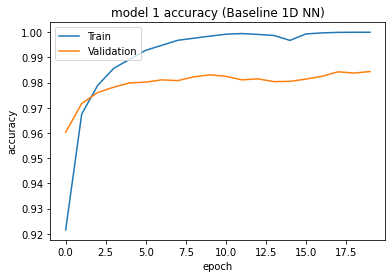

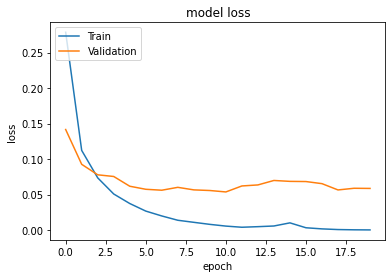

In [32]:
## PLOTTING MODEL 1

# recall that the "history" variable stores a record of the scoring metrics after each epoch,
# which allows us to easily plot the progress the model as it trains

# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model 1 accuracy (Baseline 1D NN)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

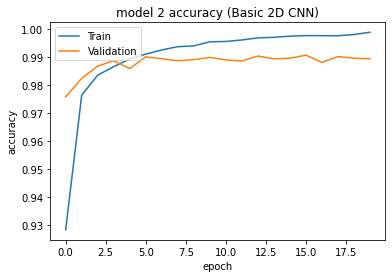

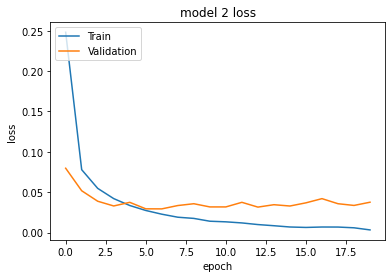

In [33]:
## PLOTTING MODEL 2

# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model 2 accuracy (Basic 2D CNN)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model 2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

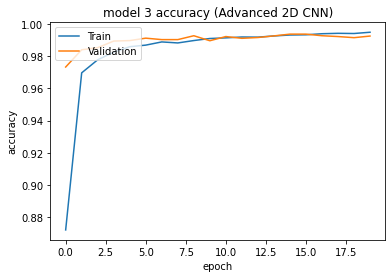

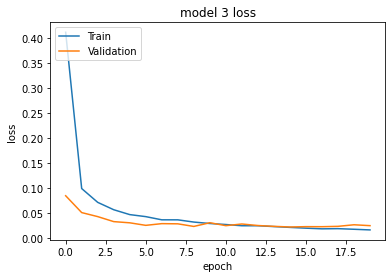

In [34]:
## PLOTTING MODEL 3

# summarize history for accuracy
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model 3 accuracy (Advanced 2D CNN)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model 3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Let's play around with the amount of data on the training set

We saw in the first model how important the data is in the quality of a model. This is a good opportunity to further study how neural networks work. Since this specific problem has a lot of data (over 60'000 training images), it would be interesting to study how the performance of models change based on the amount of training data we feed them.

Let's start off with a test run by feeding the models 5000 training images instead of 60'000:

### Test run with only 5'000 train_set images instead of 60'000

Epoch 1/10
25/25 - 1s - loss: 0.8594 - accuracy: 0.7754 - val_loss: 0.4019 - val_accuracy: 0.8858
Epoch 2/10
25/25 - 0s - loss: 0.3069 - accuracy: 0.9146 - val_loss: 0.3146 - val_accuracy: 0.9102
Epoch 3/10
25/25 - 0s - loss: 0.2242 - accuracy: 0.9398 - val_loss: 0.2756 - val_accuracy: 0.9181
Epoch 4/10
25/25 - 0s - loss: 0.1803 - accuracy: 0.9560 - val_loss: 0.2716 - val_accuracy: 0.9208
Epoch 5/10
25/25 - 0s - loss: 0.1433 - accuracy: 0.9658 - val_loss: 0.2356 - val_accuracy: 0.9297
Epoch 6/10
25/25 - 0s - loss: 0.1132 - accuracy: 0.9746 - val_loss: 0.2275 - val_accuracy: 0.9317
Epoch 7/10
25/25 - 0s - loss: 0.0915 - accuracy: 0.9814 - val_loss: 0.2302 - val_accuracy: 0.9306
Epoch 8/10
25/25 - 0s - loss: 0.0763 - accuracy: 0.9852 - val_loss: 0.2080 - val_accuracy: 0.9396
Epoch 9/10
25/25 - 0s - loss: 0.0591 - accuracy: 0.9900 - val_loss: 0.2073 - val_accuracy: 0.9393
Epoch 10/10
25/25 - 0s - loss: 0.0499 - accuracy: 0.9924 - val_loss: 0.2076 - val_accuracy: 0.9393
Epoch 1/10
25/25 - 

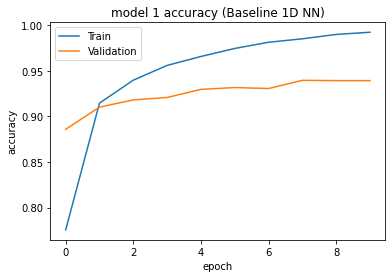

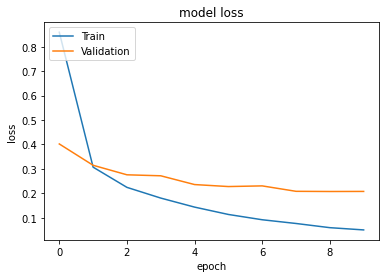

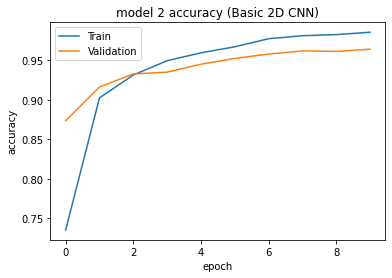

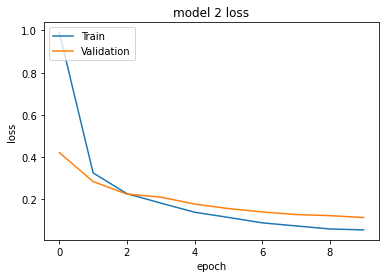

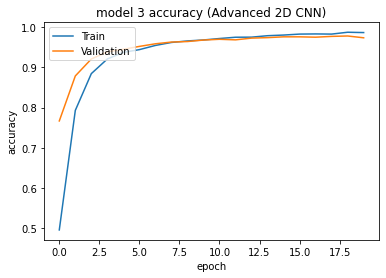

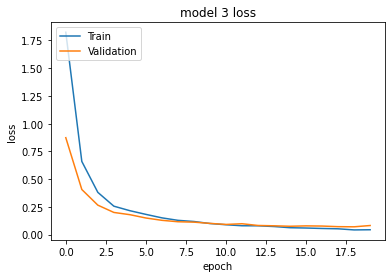

In [35]:
# 1D Data for model 1
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], total_pixels)).astype('float')
X_test = X_test.reshape((X_test.shape[0], total_pixels)).astype('float')

# normalizing
X_train = X_train / 255
X_test = X_test / 255

# categories
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# Sampling the 1D data
X_train_sampled, y_train_sampled = X_train[:5000], y_train[:5000]

# training model 1
model1 = baseline_model()
history1 = model1.fit(X_train_sampled, y_train_sampled, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# 2D Data for model 2
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# the arguments of reshape are data, length, width, color-filters (3 for rgb, 1 for greyscale)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

# normalizing
X_train = X_train / 255
X_test = X_test / 255

# categories
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

X_train_sampled, y_train_sampled = X_train[:5000], y_train[:5000]

# training model 2
model2 = cnn_model()
history2 = model2.fit(X_train_sampled, y_train_sampled, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# 2D Data for model 3
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# the arguments of reshape are data, length, width, color-filters (3 for rgb, 1 for greyscale)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

# normalizing
X_train = X_train / 255
X_test = X_test / 255

# categories
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

X_train_sampled, y_train_sampled = X_train[:5000], y_train[:5000]

# training model 3
model3 = cnn_model2()
history3 = model3.fit(X_train_sampled, y_train_sampled, validation_data=(X_test, y_test), epochs=20, batch_size=200)

## PLOTTING MODEL 1

# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model 1 accuracy (Baseline 1D NN)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## PLOTTING MODEL 2

# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model 2 accuracy (Basic 2D CNN)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model 2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## PLOTTING MODEL 3

# summarize history for accuracy
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model 3 accuracy (Advanced 2D CNN)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model 3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Trying the same for ranges of training images (500 to 10000)

You can clearly see from the test run that the quality of the model severely decreases when going from 60'000 to 5'000 training images. Let us now re-run the experiment where we'll repeat the exact same procedure as above, but this time we'll incrementally feed the 3 models more and more images. For example:

First trial: the models are allowed to train on 500 images

Second trial: the models are allowed to train on 1000 images

Third trial: the models are allowed to train on 1500 images

etc (...)

LOOP: 500.0 training images
Epoch 1/20
3/3 - 0s - loss: 2.1210 - accuracy: 0.2480 - val_loss: 1.5987 - val_accuracy: 0.6278
Epoch 2/20
3/3 - 0s - loss: 1.2611 - accuracy: 0.7740 - val_loss: 1.1438 - val_accuracy: 0.7098
Epoch 3/20
3/3 - 0s - loss: 0.7847 - accuracy: 0.8500 - val_loss: 0.8911 - val_accuracy: 0.7517
Epoch 4/20
3/3 - 0s - loss: 0.5508 - accuracy: 0.8780 - val_loss: 0.7598 - val_accuracy: 0.7726
Epoch 5/20
3/3 - 0s - loss: 0.4109 - accuracy: 0.9040 - val_loss: 0.6685 - val_accuracy: 0.7904
Epoch 6/20
3/3 - 0s - loss: 0.3187 - accuracy: 0.9220 - val_loss: 0.6147 - val_accuracy: 0.8052
Epoch 7/20
3/3 - 0s - loss: 0.2591 - accuracy: 0.9340 - val_loss: 0.5751 - val_accuracy: 0.8206
Epoch 8/20
3/3 - 0s - loss: 0.2141 - accuracy: 0.9480 - val_loss: 0.5481 - val_accuracy: 0.8325
Epoch 9/20
3/3 - 0s - loss: 0.1749 - accuracy: 0.9600 - val_loss: 0.5283 - val_accuracy: 0.8381
Epoch 10/20
3/3 - 0s - loss: 0.1432 - accuracy: 0.9740 - val_loss: 0.5152 - val_accuracy: 0.8398
Epoch 11/20

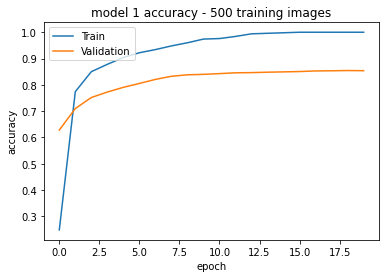

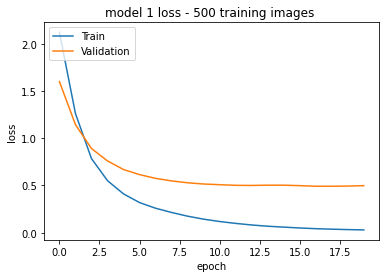

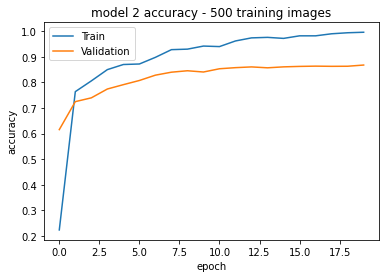

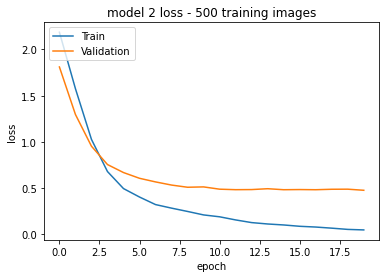

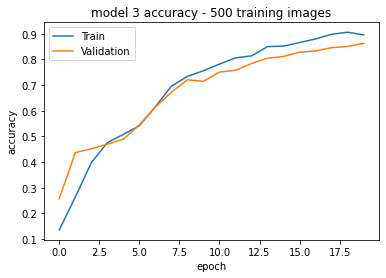

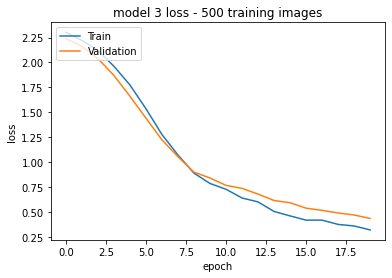

LOOP: 1000.0 training images
Epoch 1/20
5/5 - 0s - loss: 1.8356 - accuracy: 0.4870 - val_loss: 1.2299 - val_accuracy: 0.7293
Epoch 2/20
5/5 - 0s - loss: 0.8857 - accuracy: 0.8160 - val_loss: 0.7653 - val_accuracy: 0.7988
Epoch 3/20
5/5 - 0s - loss: 0.5442 - accuracy: 0.8660 - val_loss: 0.5699 - val_accuracy: 0.8363
Epoch 4/20
5/5 - 0s - loss: 0.3896 - accuracy: 0.8930 - val_loss: 0.4971 - val_accuracy: 0.8483
Epoch 5/20
5/5 - 0s - loss: 0.3068 - accuracy: 0.9170 - val_loss: 0.4716 - val_accuracy: 0.8527
Epoch 6/20
5/5 - 0s - loss: 0.2526 - accuracy: 0.9370 - val_loss: 0.4081 - val_accuracy: 0.8766
Epoch 7/20
5/5 - 0s - loss: 0.2054 - accuracy: 0.9490 - val_loss: 0.3985 - val_accuracy: 0.8790
Epoch 8/20
5/5 - 0s - loss: 0.1730 - accuracy: 0.9620 - val_loss: 0.4023 - val_accuracy: 0.8759
Epoch 9/20
5/5 - 0s - loss: 0.1436 - accuracy: 0.9730 - val_loss: 0.3800 - val_accuracy: 0.8841
Epoch 10/20
5/5 - 0s - loss: 0.1231 - accuracy: 0.9790 - val_loss: 0.3873 - val_accuracy: 0.8823
Epoch 11/2

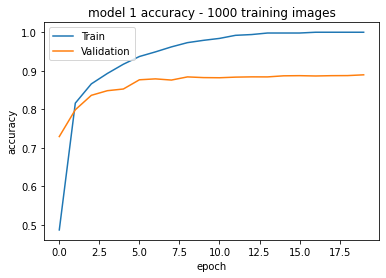

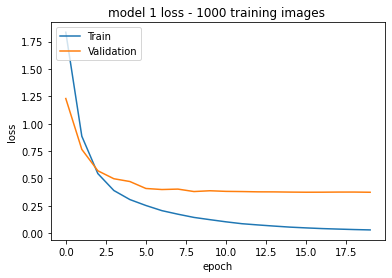

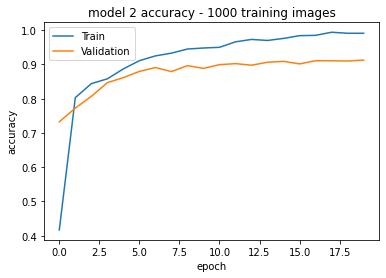

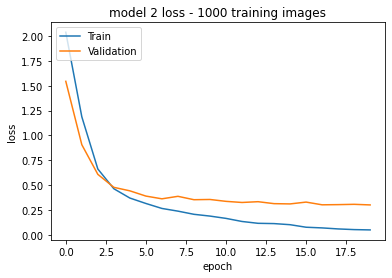

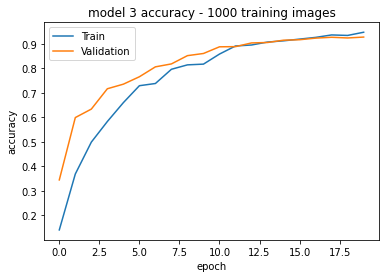

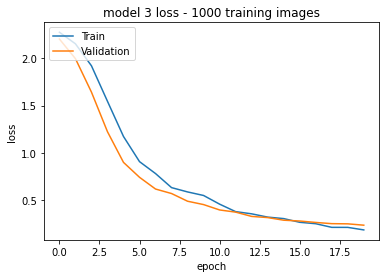

LOOP: 1500.0 training images
Epoch 1/20
8/8 - 0s - loss: 1.5506 - accuracy: 0.6040 - val_loss: 0.8620 - val_accuracy: 0.7927
Epoch 2/20
8/8 - 0s - loss: 0.6236 - accuracy: 0.8593 - val_loss: 0.5494 - val_accuracy: 0.8389
Epoch 3/20
8/8 - 0s - loss: 0.4051 - accuracy: 0.8907 - val_loss: 0.4468 - val_accuracy: 0.8660
Epoch 4/20
8/8 - 0s - loss: 0.3071 - accuracy: 0.9173 - val_loss: 0.3951 - val_accuracy: 0.8856
Epoch 5/20
8/8 - 0s - loss: 0.2481 - accuracy: 0.9333 - val_loss: 0.3673 - val_accuracy: 0.8926
Epoch 6/20
8/8 - 0s - loss: 0.2054 - accuracy: 0.9507 - val_loss: 0.3520 - val_accuracy: 0.8980
Epoch 7/20
8/8 - 0s - loss: 0.1688 - accuracy: 0.9620 - val_loss: 0.3505 - val_accuracy: 0.8935
Epoch 8/20
8/8 - 0s - loss: 0.1437 - accuracy: 0.9680 - val_loss: 0.3375 - val_accuracy: 0.9010
Epoch 9/20
8/8 - 0s - loss: 0.1184 - accuracy: 0.9787 - val_loss: 0.3364 - val_accuracy: 0.8984
Epoch 10/20
8/8 - 0s - loss: 0.1011 - accuracy: 0.9860 - val_loss: 0.3355 - val_accuracy: 0.8973
Epoch 11/2

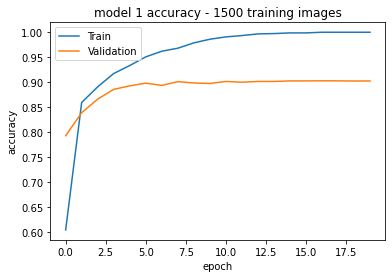

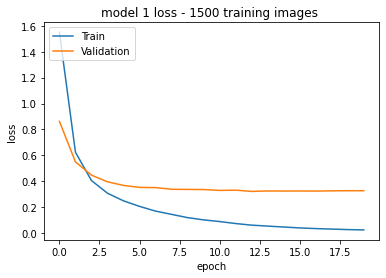

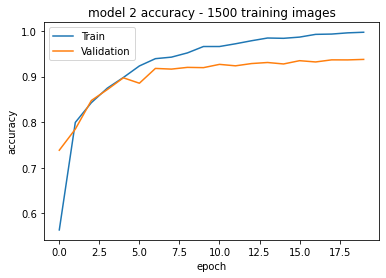

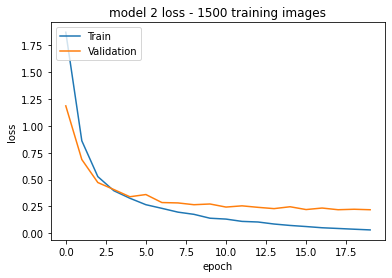

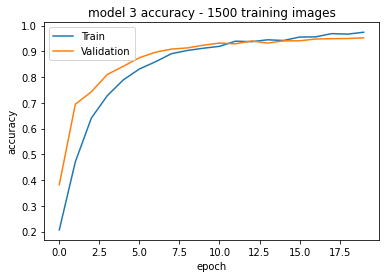

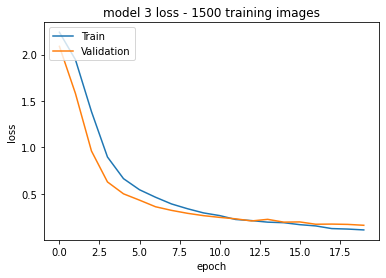

LOOP: 2000.0 training images
Epoch 1/20
10/10 - 0s - loss: 1.4673 - accuracy: 0.5915 - val_loss: 0.7933 - val_accuracy: 0.7783
Epoch 2/20
10/10 - 0s - loss: 0.5659 - accuracy: 0.8515 - val_loss: 0.4848 - val_accuracy: 0.8624
Epoch 3/20
10/10 - 0s - loss: 0.3730 - accuracy: 0.8950 - val_loss: 0.3937 - val_accuracy: 0.8836
Epoch 4/20
10/10 - 0s - loss: 0.2838 - accuracy: 0.9290 - val_loss: 0.3571 - val_accuracy: 0.8928
Epoch 5/20
10/10 - 0s - loss: 0.2326 - accuracy: 0.9455 - val_loss: 0.3424 - val_accuracy: 0.8991
Epoch 6/20
10/10 - 0s - loss: 0.1945 - accuracy: 0.9545 - val_loss: 0.3343 - val_accuracy: 0.9008
Epoch 7/20
10/10 - 0s - loss: 0.1602 - accuracy: 0.9645 - val_loss: 0.3153 - val_accuracy: 0.9057
Epoch 8/20
10/10 - 0s - loss: 0.1350 - accuracy: 0.9700 - val_loss: 0.3091 - val_accuracy: 0.9079
Epoch 9/20
10/10 - 0s - loss: 0.1176 - accuracy: 0.9765 - val_loss: 0.3102 - val_accuracy: 0.9053
Epoch 10/20
10/10 - 0s - loss: 0.0989 - accuracy: 0.9820 - val_loss: 0.2990 - val_accurac

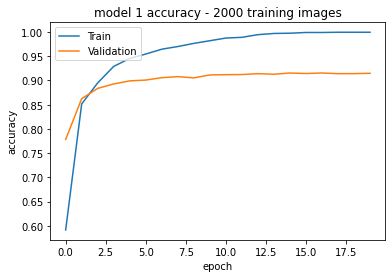

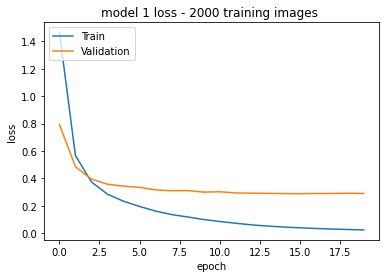

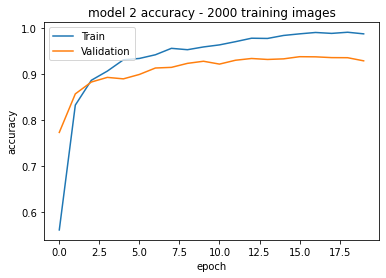

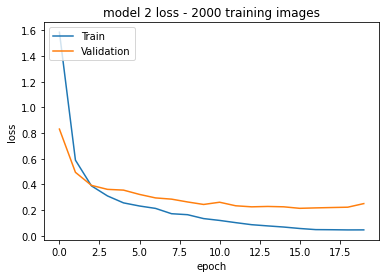

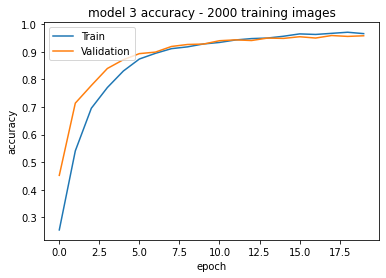

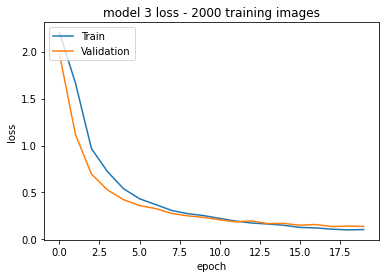

LOOP: 2500.0 training images
Epoch 1/20
13/13 - 0s - loss: 1.2253 - accuracy: 0.6692 - val_loss: 0.5954 - val_accuracy: 0.8324
Epoch 2/20
13/13 - 0s - loss: 0.4336 - accuracy: 0.8800 - val_loss: 0.4081 - val_accuracy: 0.8793
Epoch 3/20
13/13 - 0s - loss: 0.2973 - accuracy: 0.9172 - val_loss: 0.3460 - val_accuracy: 0.9005
Epoch 4/20
13/13 - 0s - loss: 0.2265 - accuracy: 0.9392 - val_loss: 0.3209 - val_accuracy: 0.9075
Epoch 5/20
13/13 - 0s - loss: 0.1847 - accuracy: 0.9592 - val_loss: 0.3121 - val_accuracy: 0.9066
Epoch 6/20
13/13 - 0s - loss: 0.1548 - accuracy: 0.9640 - val_loss: 0.3078 - val_accuracy: 0.9069
Epoch 7/20
13/13 - 0s - loss: 0.1306 - accuracy: 0.9708 - val_loss: 0.2923 - val_accuracy: 0.9120
Epoch 8/20
13/13 - 0s - loss: 0.1067 - accuracy: 0.9808 - val_loss: 0.3033 - val_accuracy: 0.9104
Epoch 9/20
13/13 - 0s - loss: 0.0935 - accuracy: 0.9844 - val_loss: 0.2807 - val_accuracy: 0.9159
Epoch 10/20
13/13 - 0s - loss: 0.0791 - accuracy: 0.9856 - val_loss: 0.2746 - val_accurac

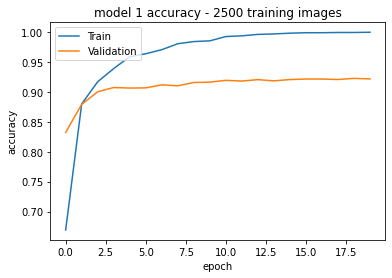

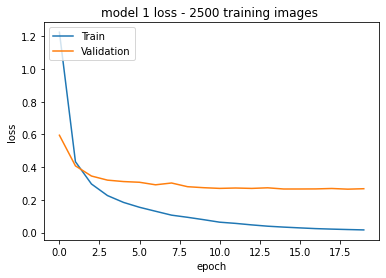

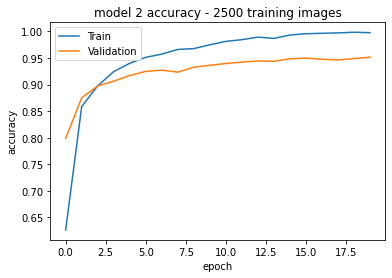

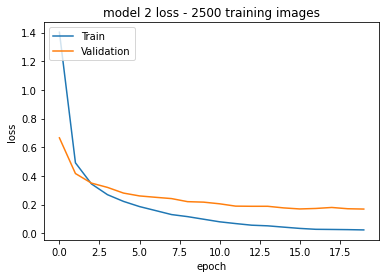

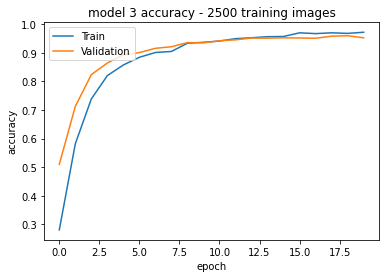

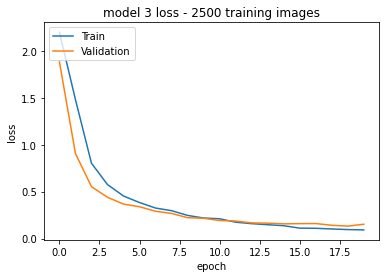

LOOP: 3000.0 training images
Epoch 1/20
15/15 - 0s - loss: 1.0960 - accuracy: 0.6993 - val_loss: 0.5206 - val_accuracy: 0.8568
Epoch 2/20
15/15 - 0s - loss: 0.3994 - accuracy: 0.8823 - val_loss: 0.3832 - val_accuracy: 0.8877
Epoch 3/20
15/15 - 0s - loss: 0.2796 - accuracy: 0.9203 - val_loss: 0.3369 - val_accuracy: 0.9004
Epoch 4/20
15/15 - 0s - loss: 0.2194 - accuracy: 0.9410 - val_loss: 0.3178 - val_accuracy: 0.9075
Epoch 5/20
15/15 - 0s - loss: 0.1771 - accuracy: 0.9553 - val_loss: 0.2966 - val_accuracy: 0.9128
Epoch 6/20
15/15 - 0s - loss: 0.1444 - accuracy: 0.9677 - val_loss: 0.2906 - val_accuracy: 0.9141
Epoch 7/20
15/15 - 0s - loss: 0.1234 - accuracy: 0.9727 - val_loss: 0.2926 - val_accuracy: 0.9148
Epoch 8/20
15/15 - 0s - loss: 0.1040 - accuracy: 0.9783 - val_loss: 0.2732 - val_accuracy: 0.9189
Epoch 9/20
15/15 - 0s - loss: 0.0887 - accuracy: 0.9847 - val_loss: 0.2685 - val_accuracy: 0.9219
Epoch 10/20
15/15 - 0s - loss: 0.0755 - accuracy: 0.9897 - val_loss: 0.2656 - val_accurac

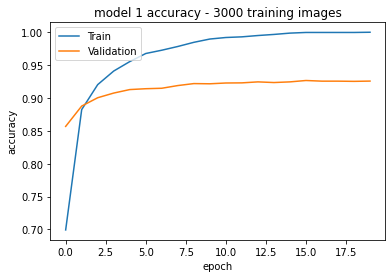

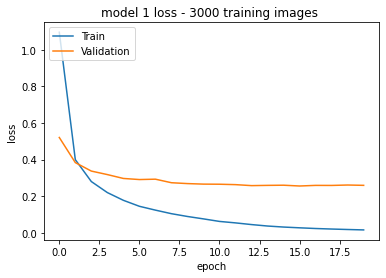

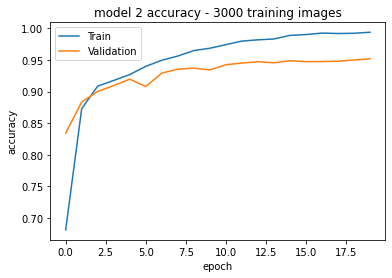

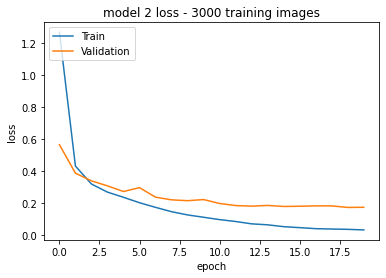

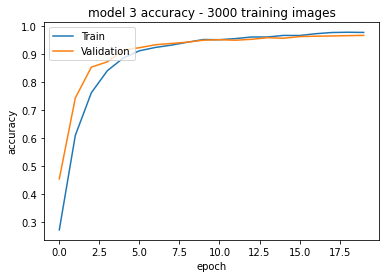

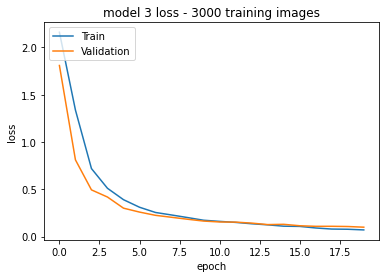

LOOP: 3500.0 training images
Epoch 1/20
18/18 - 1s - loss: 1.0501 - accuracy: 0.7160 - val_loss: 0.4912 - val_accuracy: 0.8591
Epoch 2/20
18/18 - 0s - loss: 0.3521 - accuracy: 0.8974 - val_loss: 0.3641 - val_accuracy: 0.8957
Epoch 3/20
18/18 - 0s - loss: 0.2565 - accuracy: 0.9266 - val_loss: 0.3276 - val_accuracy: 0.9007
Epoch 4/20
18/18 - 0s - loss: 0.2063 - accuracy: 0.9503 - val_loss: 0.2979 - val_accuracy: 0.9109
Epoch 5/20
18/18 - 0s - loss: 0.1607 - accuracy: 0.9617 - val_loss: 0.2787 - val_accuracy: 0.9192
Epoch 6/20
18/18 - 0s - loss: 0.1300 - accuracy: 0.9689 - val_loss: 0.2663 - val_accuracy: 0.9209
Epoch 7/20
18/18 - 0s - loss: 0.1083 - accuracy: 0.9777 - val_loss: 0.2613 - val_accuracy: 0.9219
Epoch 8/20
18/18 - 0s - loss: 0.0901 - accuracy: 0.9820 - val_loss: 0.2455 - val_accuracy: 0.9268
Epoch 9/20
18/18 - 0s - loss: 0.0766 - accuracy: 0.9880 - val_loss: 0.2435 - val_accuracy: 0.9280
Epoch 10/20
18/18 - 0s - loss: 0.0608 - accuracy: 0.9906 - val_loss: 0.2433 - val_accurac

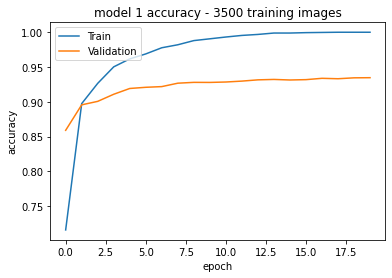

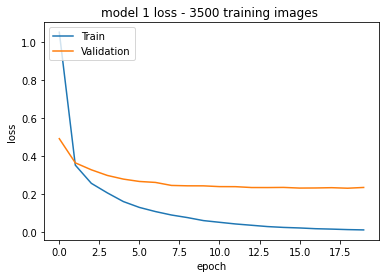

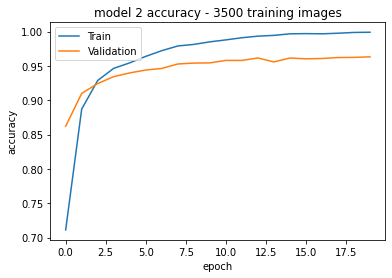

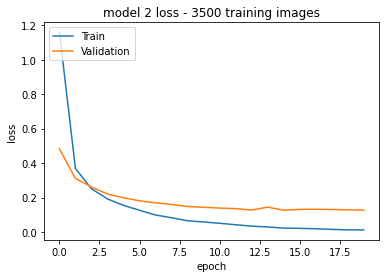

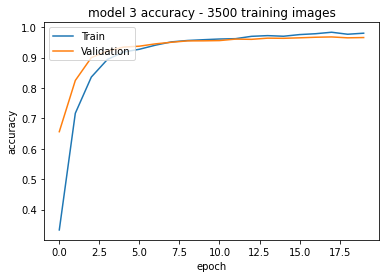

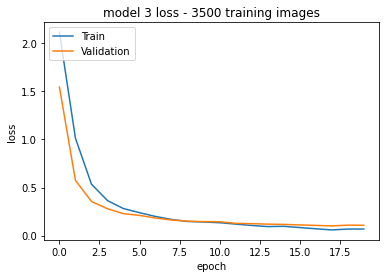

LOOP: 4000.0 training images
Epoch 1/20
20/20 - 1s - loss: 0.9315 - accuracy: 0.7602 - val_loss: 0.4355 - val_accuracy: 0.8789
Epoch 2/20
20/20 - 0s - loss: 0.3264 - accuracy: 0.9068 - val_loss: 0.3448 - val_accuracy: 0.8993
Epoch 3/20
20/20 - 0s - loss: 0.2359 - accuracy: 0.9350 - val_loss: 0.3001 - val_accuracy: 0.9124
Epoch 4/20
20/20 - 0s - loss: 0.1902 - accuracy: 0.9495 - val_loss: 0.2944 - val_accuracy: 0.9110
Epoch 5/20
20/20 - 0s - loss: 0.1529 - accuracy: 0.9635 - val_loss: 0.2643 - val_accuracy: 0.9190
Epoch 6/20
20/20 - 0s - loss: 0.1200 - accuracy: 0.9743 - val_loss: 0.2471 - val_accuracy: 0.9257
Epoch 7/20
20/20 - 0s - loss: 0.0980 - accuracy: 0.9803 - val_loss: 0.2390 - val_accuracy: 0.9290
Epoch 8/20
20/20 - 0s - loss: 0.0795 - accuracy: 0.9877 - val_loss: 0.2359 - val_accuracy: 0.9298
Epoch 9/20
20/20 - 0s - loss: 0.0640 - accuracy: 0.9908 - val_loss: 0.2278 - val_accuracy: 0.9318
Epoch 10/20
20/20 - 0s - loss: 0.0532 - accuracy: 0.9918 - val_loss: 0.2311 - val_accurac

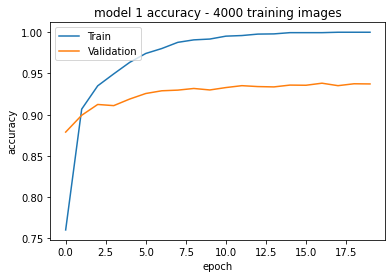

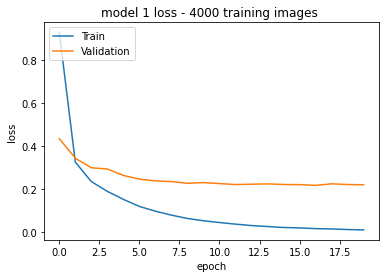

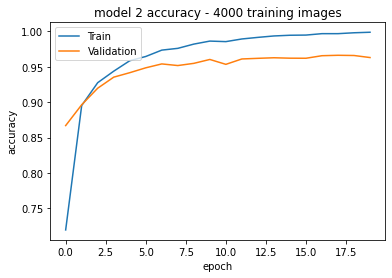

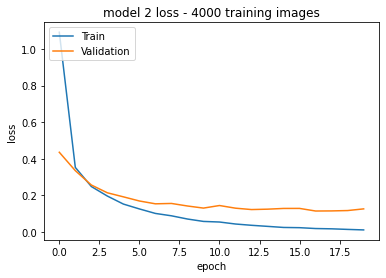

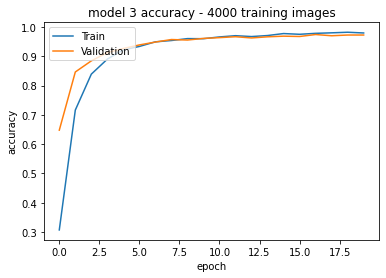

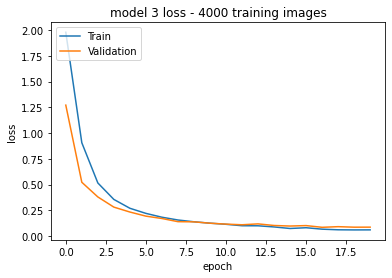

LOOP: 4500.0 training images
Epoch 1/20
23/23 - 1s - loss: 0.8977 - accuracy: 0.7618 - val_loss: 0.4254 - val_accuracy: 0.8818
Epoch 2/20
23/23 - 0s - loss: 0.3190 - accuracy: 0.9093 - val_loss: 0.3255 - val_accuracy: 0.9058
Epoch 3/20
23/23 - 0s - loss: 0.2322 - accuracy: 0.9362 - val_loss: 0.2920 - val_accuracy: 0.9135
Epoch 4/20
23/23 - 0s - loss: 0.1818 - accuracy: 0.9522 - val_loss: 0.2611 - val_accuracy: 0.9247
Epoch 5/20
23/23 - 0s - loss: 0.1424 - accuracy: 0.9656 - val_loss: 0.2493 - val_accuracy: 0.9259
Epoch 6/20
23/23 - 0s - loss: 0.1149 - accuracy: 0.9720 - val_loss: 0.2441 - val_accuracy: 0.9267
Epoch 7/20
23/23 - 0s - loss: 0.0965 - accuracy: 0.9784 - val_loss: 0.2407 - val_accuracy: 0.9292
Epoch 8/20
23/23 - 0s - loss: 0.0796 - accuracy: 0.9831 - val_loss: 0.2264 - val_accuracy: 0.9337
Epoch 9/20
23/23 - 0s - loss: 0.0641 - accuracy: 0.9893 - val_loss: 0.2282 - val_accuracy: 0.9327
Epoch 10/20
23/23 - 0s - loss: 0.0553 - accuracy: 0.9911 - val_loss: 0.2209 - val_accurac

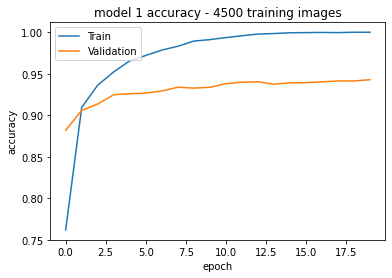

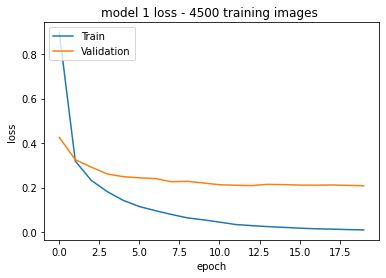

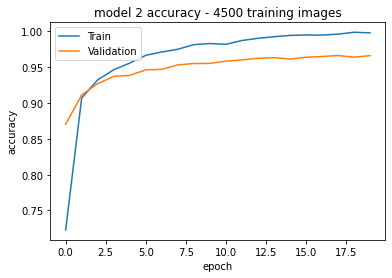

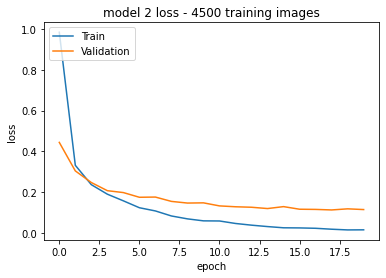

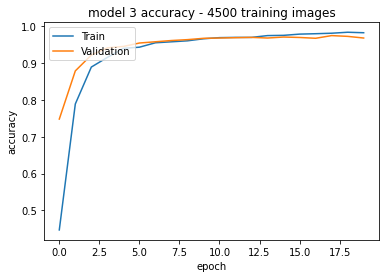

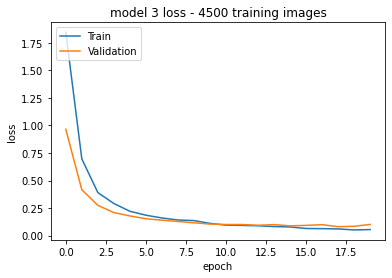

LOOP: 5000.0 training images
Epoch 1/20
25/25 - 1s - loss: 0.9020 - accuracy: 0.7586 - val_loss: 0.4083 - val_accuracy: 0.8832
Epoch 2/20
25/25 - 0s - loss: 0.3134 - accuracy: 0.9130 - val_loss: 0.3135 - val_accuracy: 0.9074
Epoch 3/20
25/25 - 0s - loss: 0.2236 - accuracy: 0.9400 - val_loss: 0.2782 - val_accuracy: 0.9184
Epoch 4/20
25/25 - 0s - loss: 0.1763 - accuracy: 0.9556 - val_loss: 0.2585 - val_accuracy: 0.9243
Epoch 5/20
25/25 - 0s - loss: 0.1417 - accuracy: 0.9652 - val_loss: 0.2453 - val_accuracy: 0.9262
Epoch 6/20
25/25 - 0s - loss: 0.1145 - accuracy: 0.9760 - val_loss: 0.2330 - val_accuracy: 0.9296
Epoch 7/20
25/25 - 0s - loss: 0.0957 - accuracy: 0.9792 - val_loss: 0.2220 - val_accuracy: 0.9337
Epoch 8/20
25/25 - 0s - loss: 0.0773 - accuracy: 0.9862 - val_loss: 0.2143 - val_accuracy: 0.9360
Epoch 9/20
25/25 - 0s - loss: 0.0613 - accuracy: 0.9898 - val_loss: 0.2050 - val_accuracy: 0.9388
Epoch 10/20
25/25 - 0s - loss: 0.0501 - accuracy: 0.9928 - val_loss: 0.2002 - val_accurac

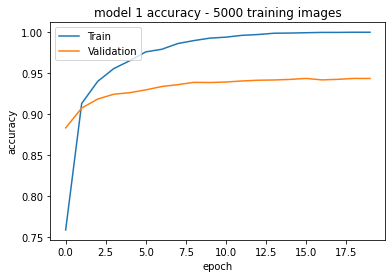

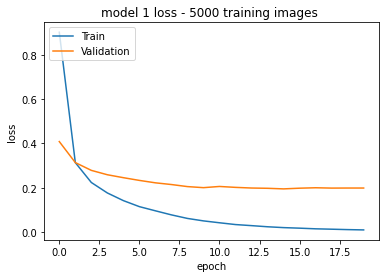

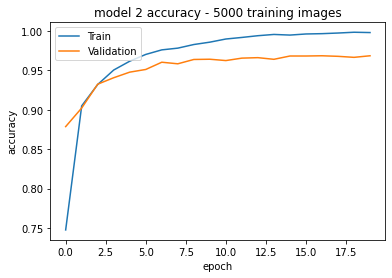

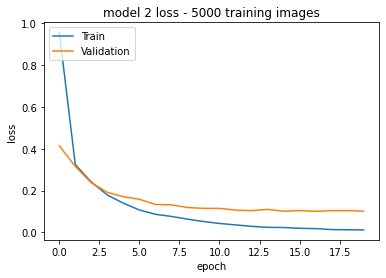

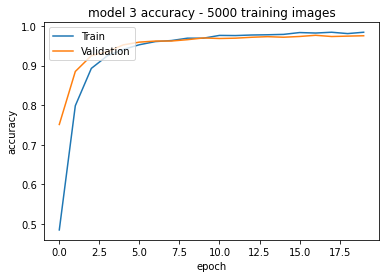

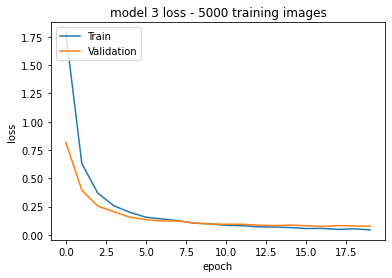

LOOP: 5500.0 training images
Epoch 1/20
28/28 - 1s - loss: 0.8261 - accuracy: 0.7791 - val_loss: 0.3875 - val_accuracy: 0.8879
Epoch 2/20
28/28 - 0s - loss: 0.2938 - accuracy: 0.9205 - val_loss: 0.3024 - val_accuracy: 0.9139
Epoch 3/20
28/28 - 0s - loss: 0.2210 - accuracy: 0.9404 - val_loss: 0.2775 - val_accuracy: 0.9193
Epoch 4/20
28/28 - 0s - loss: 0.1744 - accuracy: 0.9549 - val_loss: 0.2496 - val_accuracy: 0.9286
Epoch 5/20
28/28 - 0s - loss: 0.1309 - accuracy: 0.9676 - val_loss: 0.2364 - val_accuracy: 0.9286
Epoch 6/20
28/28 - 0s - loss: 0.1090 - accuracy: 0.9736 - val_loss: 0.2221 - val_accuracy: 0.9334
Epoch 7/20
28/28 - 0s - loss: 0.0849 - accuracy: 0.9824 - val_loss: 0.2123 - val_accuracy: 0.9359
Epoch 8/20
28/28 - 0s - loss: 0.0692 - accuracy: 0.9871 - val_loss: 0.2018 - val_accuracy: 0.9402
Epoch 9/20
28/28 - 0s - loss: 0.0566 - accuracy: 0.9909 - val_loss: 0.1985 - val_accuracy: 0.9404
Epoch 10/20
28/28 - 0s - loss: 0.0443 - accuracy: 0.9940 - val_loss: 0.1969 - val_accurac

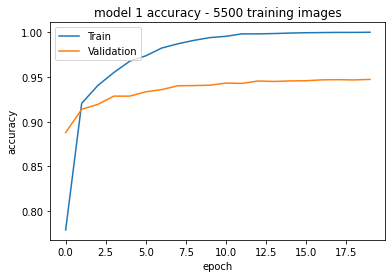

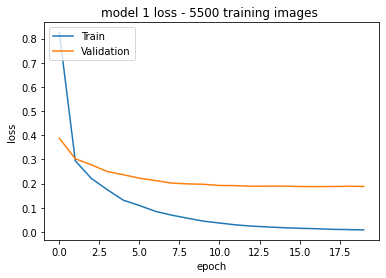

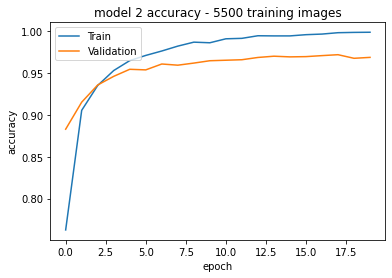

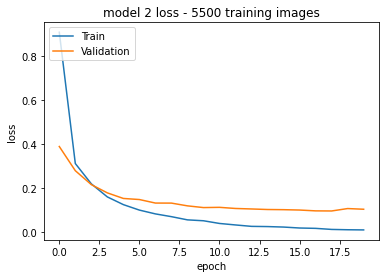

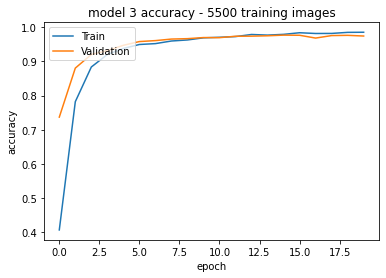

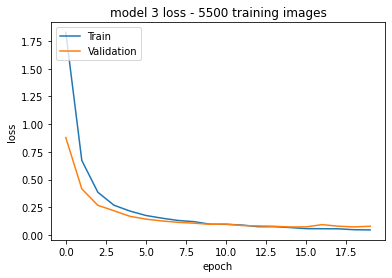

LOOP: 6000.0 training images
Epoch 1/20
30/30 - 1s - loss: 0.8031 - accuracy: 0.7778 - val_loss: 0.3895 - val_accuracy: 0.8875
Epoch 2/20
30/30 - 0s - loss: 0.2970 - accuracy: 0.9170 - val_loss: 0.3015 - val_accuracy: 0.9115
Epoch 3/20
30/30 - 0s - loss: 0.2142 - accuracy: 0.9452 - val_loss: 0.2667 - val_accuracy: 0.9230
Epoch 4/20
30/30 - 0s - loss: 0.1663 - accuracy: 0.9585 - val_loss: 0.2464 - val_accuracy: 0.9273
Epoch 5/20
30/30 - 0s - loss: 0.1327 - accuracy: 0.9675 - val_loss: 0.2240 - val_accuracy: 0.9354
Epoch 6/20
30/30 - 0s - loss: 0.1039 - accuracy: 0.9745 - val_loss: 0.2162 - val_accuracy: 0.9342
Epoch 7/20
30/30 - 0s - loss: 0.0873 - accuracy: 0.9813 - val_loss: 0.2000 - val_accuracy: 0.9382
Epoch 8/20
30/30 - 0s - loss: 0.0687 - accuracy: 0.9868 - val_loss: 0.1960 - val_accuracy: 0.9416
Epoch 9/20
30/30 - 0s - loss: 0.0550 - accuracy: 0.9903 - val_loss: 0.1928 - val_accuracy: 0.9419
Epoch 10/20
30/30 - 0s - loss: 0.0446 - accuracy: 0.9927 - val_loss: 0.1904 - val_accurac

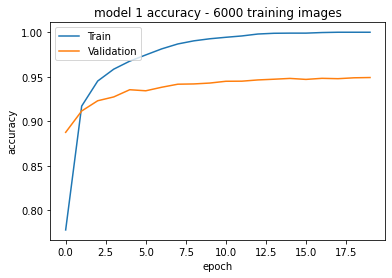

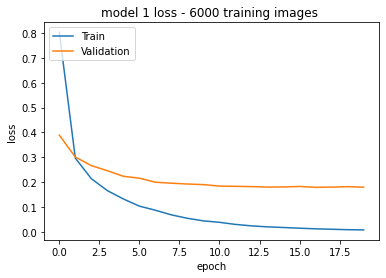

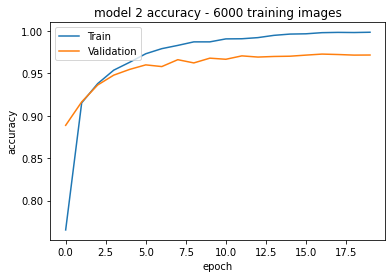

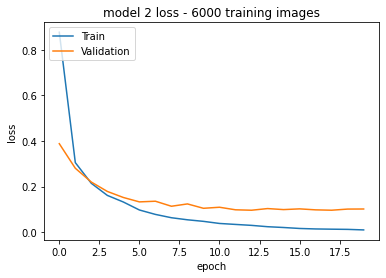

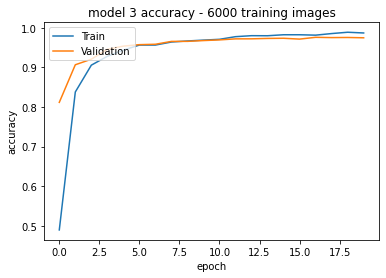

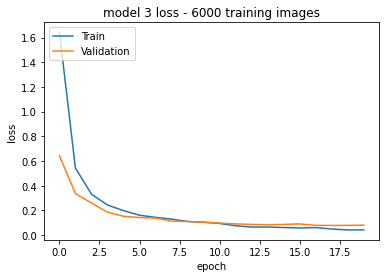

LOOP: 6500.0 training images
Epoch 1/20
33/33 - 1s - loss: 0.7380 - accuracy: 0.7991 - val_loss: 0.3698 - val_accuracy: 0.8911
Epoch 2/20
33/33 - 0s - loss: 0.2699 - accuracy: 0.9231 - val_loss: 0.2898 - val_accuracy: 0.9166
Epoch 3/20
33/33 - 0s - loss: 0.1975 - accuracy: 0.9486 - val_loss: 0.2567 - val_accuracy: 0.9247
Epoch 4/20
33/33 - 0s - loss: 0.1567 - accuracy: 0.9606 - val_loss: 0.2281 - val_accuracy: 0.9338
Epoch 5/20
33/33 - 0s - loss: 0.1178 - accuracy: 0.9708 - val_loss: 0.2237 - val_accuracy: 0.9341
Epoch 6/20
33/33 - 0s - loss: 0.0957 - accuracy: 0.9780 - val_loss: 0.2069 - val_accuracy: 0.9373
Epoch 7/20
33/33 - 0s - loss: 0.0793 - accuracy: 0.9829 - val_loss: 0.1950 - val_accuracy: 0.9413
Epoch 8/20
33/33 - 0s - loss: 0.0613 - accuracy: 0.9891 - val_loss: 0.1890 - val_accuracy: 0.9426
Epoch 9/20
33/33 - 0s - loss: 0.0475 - accuracy: 0.9931 - val_loss: 0.1863 - val_accuracy: 0.9431
Epoch 10/20
33/33 - 0s - loss: 0.0387 - accuracy: 0.9948 - val_loss: 0.1846 - val_accurac

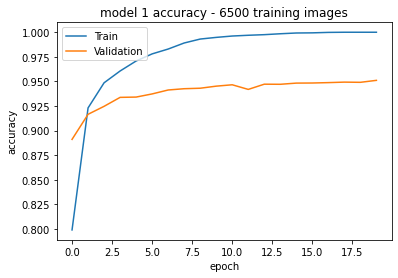

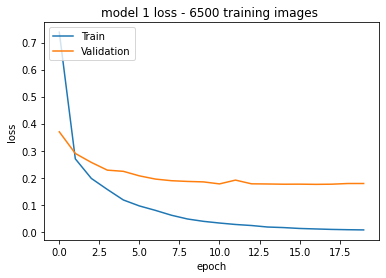

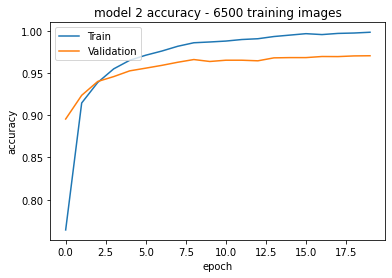

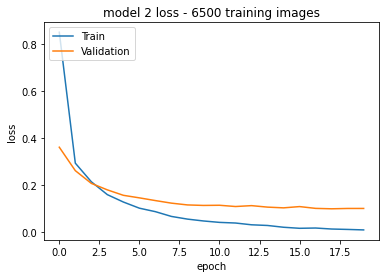

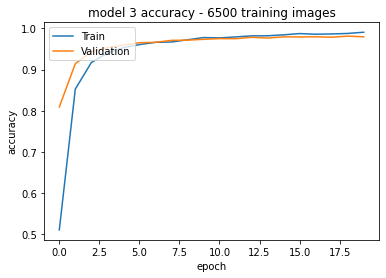

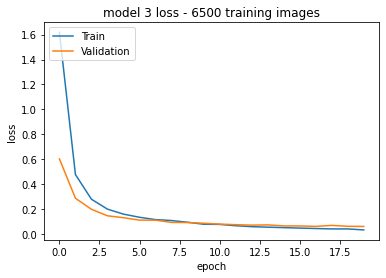

LOOP: 7000.0 training images
Epoch 1/20
35/35 - 1s - loss: 0.7249 - accuracy: 0.8060 - val_loss: 0.3682 - val_accuracy: 0.8973
Epoch 2/20
35/35 - 0s - loss: 0.2793 - accuracy: 0.9224 - val_loss: 0.2844 - val_accuracy: 0.9204
Epoch 3/20
35/35 - 0s - loss: 0.1996 - accuracy: 0.9466 - val_loss: 0.2555 - val_accuracy: 0.9283
Epoch 4/20
35/35 - 0s - loss: 0.1565 - accuracy: 0.9607 - val_loss: 0.2334 - val_accuracy: 0.9309
Epoch 5/20
35/35 - 0s - loss: 0.1252 - accuracy: 0.9689 - val_loss: 0.2202 - val_accuracy: 0.9355
Epoch 6/20
35/35 - 0s - loss: 0.0998 - accuracy: 0.9756 - val_loss: 0.2070 - val_accuracy: 0.9376
Epoch 7/20
35/35 - 0s - loss: 0.0786 - accuracy: 0.9830 - val_loss: 0.1897 - val_accuracy: 0.9434
Epoch 8/20
35/35 - 0s - loss: 0.0634 - accuracy: 0.9876 - val_loss: 0.1881 - val_accuracy: 0.9438
Epoch 9/20
35/35 - 0s - loss: 0.0506 - accuracy: 0.9913 - val_loss: 0.1811 - val_accuracy: 0.9448
Epoch 10/20
35/35 - 0s - loss: 0.0415 - accuracy: 0.9924 - val_loss: 0.1832 - val_accurac

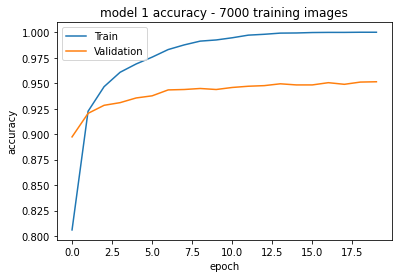

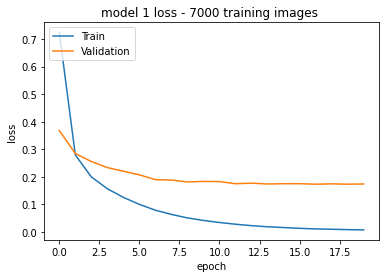

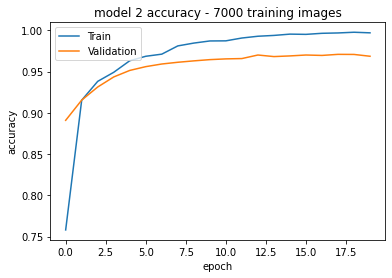

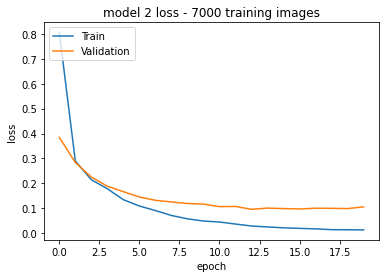

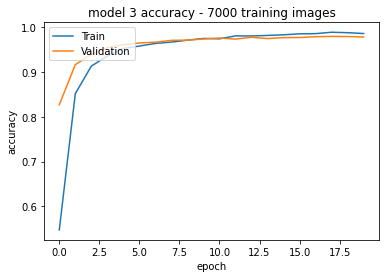

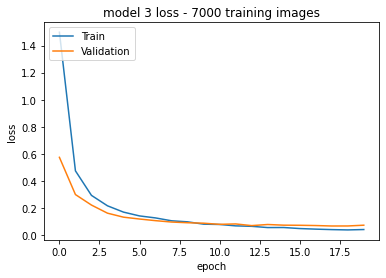

LOOP: 7500.0 training images
Epoch 1/20
38/38 - 1s - loss: 0.7073 - accuracy: 0.8044 - val_loss: 0.3588 - val_accuracy: 0.8948
Epoch 2/20
38/38 - 0s - loss: 0.2628 - accuracy: 0.9280 - val_loss: 0.2778 - val_accuracy: 0.9197
Epoch 3/20
38/38 - 0s - loss: 0.1947 - accuracy: 0.9471 - val_loss: 0.2421 - val_accuracy: 0.9294
Epoch 4/20
38/38 - 0s - loss: 0.1485 - accuracy: 0.9615 - val_loss: 0.2251 - val_accuracy: 0.9331
Epoch 5/20
38/38 - 0s - loss: 0.1182 - accuracy: 0.9705 - val_loss: 0.2117 - val_accuracy: 0.9355
Epoch 6/20
38/38 - 0s - loss: 0.0956 - accuracy: 0.9764 - val_loss: 0.1996 - val_accuracy: 0.9394
Epoch 7/20
38/38 - 0s - loss: 0.0761 - accuracy: 0.9829 - val_loss: 0.1877 - val_accuracy: 0.9443
Epoch 8/20
38/38 - 0s - loss: 0.0611 - accuracy: 0.9871 - val_loss: 0.1863 - val_accuracy: 0.9445
Epoch 9/20
38/38 - 0s - loss: 0.0481 - accuracy: 0.9915 - val_loss: 0.1754 - val_accuracy: 0.9464
Epoch 10/20
38/38 - 0s - loss: 0.0399 - accuracy: 0.9933 - val_loss: 0.1813 - val_accurac

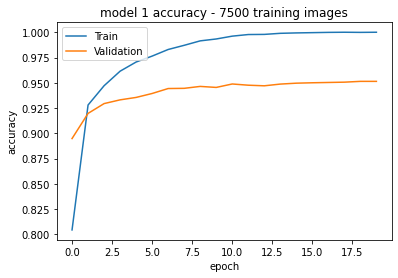

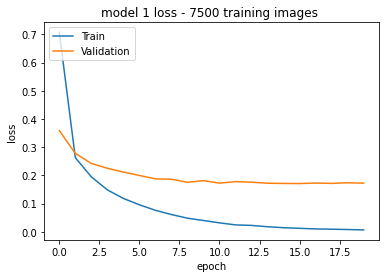

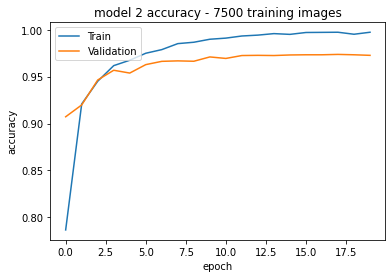

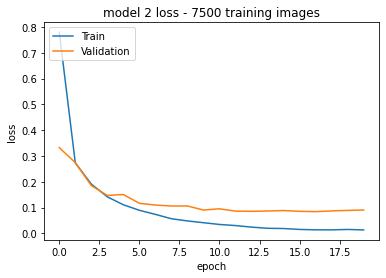

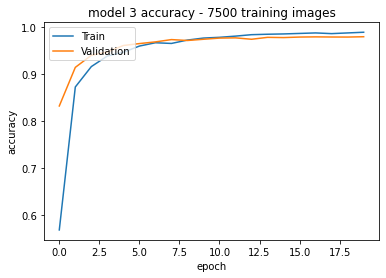

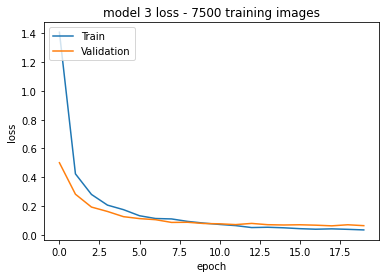

LOOP: 8000.0 training images
Epoch 1/20
40/40 - 1s - loss: 0.6701 - accuracy: 0.8174 - val_loss: 0.3280 - val_accuracy: 0.9073
Epoch 2/20
40/40 - 0s - loss: 0.2582 - accuracy: 0.9277 - val_loss: 0.2655 - val_accuracy: 0.9248
Epoch 3/20
40/40 - 0s - loss: 0.1920 - accuracy: 0.9466 - val_loss: 0.2454 - val_accuracy: 0.9246
Epoch 4/20
40/40 - 0s - loss: 0.1502 - accuracy: 0.9592 - val_loss: 0.2188 - val_accuracy: 0.9365
Epoch 5/20
40/40 - 0s - loss: 0.1116 - accuracy: 0.9709 - val_loss: 0.1989 - val_accuracy: 0.9408
Epoch 6/20
40/40 - 0s - loss: 0.0883 - accuracy: 0.9794 - val_loss: 0.1912 - val_accuracy: 0.9419
Epoch 7/20
40/40 - 0s - loss: 0.0701 - accuracy: 0.9854 - val_loss: 0.1855 - val_accuracy: 0.9447
Epoch 8/20
40/40 - 0s - loss: 0.0574 - accuracy: 0.9893 - val_loss: 0.1742 - val_accuracy: 0.9482
Epoch 9/20
40/40 - 0s - loss: 0.0447 - accuracy: 0.9921 - val_loss: 0.1726 - val_accuracy: 0.9504
Epoch 10/20
40/40 - 0s - loss: 0.0381 - accuracy: 0.9936 - val_loss: 0.1679 - val_accurac

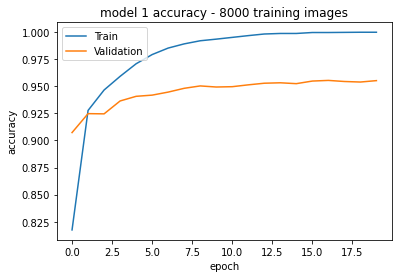

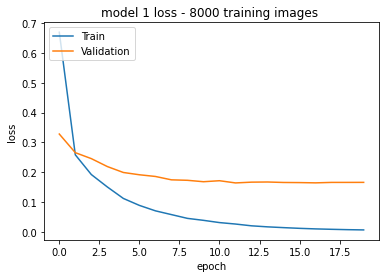

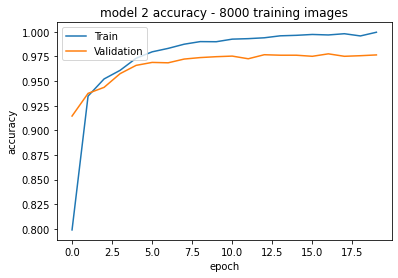

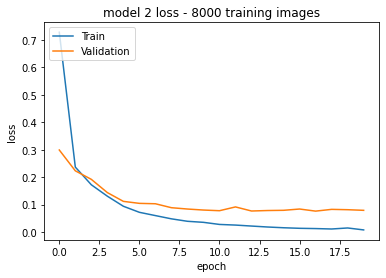

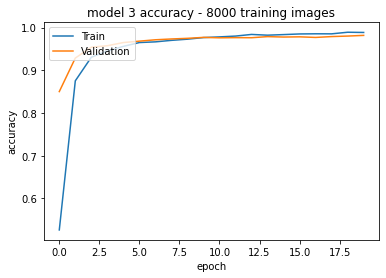

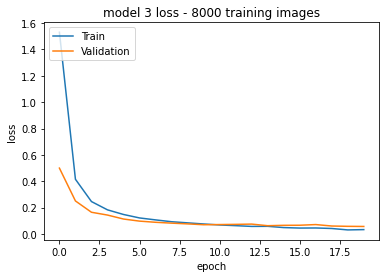

LOOP: 8500.0 training images
Epoch 1/20
43/43 - 1s - loss: 0.6620 - accuracy: 0.8174 - val_loss: 0.3361 - val_accuracy: 0.9051
Epoch 2/20
43/43 - 0s - loss: 0.2562 - accuracy: 0.9282 - val_loss: 0.2687 - val_accuracy: 0.9217
Epoch 3/20
43/43 - 0s - loss: 0.1906 - accuracy: 0.9480 - val_loss: 0.2261 - val_accuracy: 0.9376
Epoch 4/20
43/43 - 0s - loss: 0.1492 - accuracy: 0.9609 - val_loss: 0.2141 - val_accuracy: 0.9359
Epoch 5/20
43/43 - 0s - loss: 0.1217 - accuracy: 0.9692 - val_loss: 0.1940 - val_accuracy: 0.9409
Epoch 6/20
43/43 - 0s - loss: 0.0892 - accuracy: 0.9791 - val_loss: 0.1874 - val_accuracy: 0.9441
Epoch 7/20
43/43 - 0s - loss: 0.0738 - accuracy: 0.9829 - val_loss: 0.1812 - val_accuracy: 0.9445
Epoch 8/20
43/43 - 0s - loss: 0.0588 - accuracy: 0.9879 - val_loss: 0.1694 - val_accuracy: 0.9487
Epoch 9/20
43/43 - 0s - loss: 0.0457 - accuracy: 0.9920 - val_loss: 0.1641 - val_accuracy: 0.9497
Epoch 10/20
43/43 - 0s - loss: 0.0380 - accuracy: 0.9947 - val_loss: 0.1611 - val_accurac

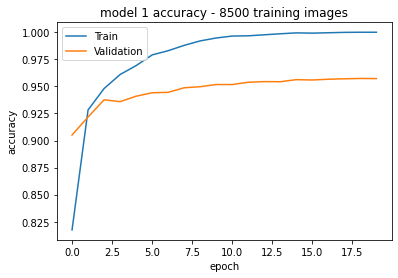

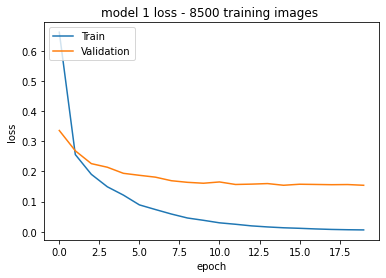

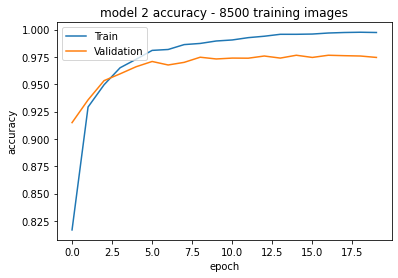

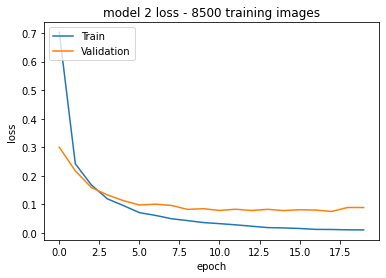

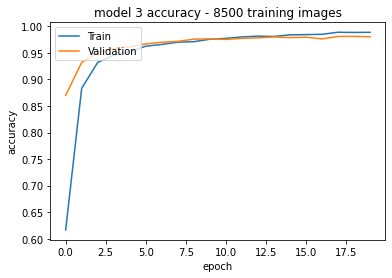

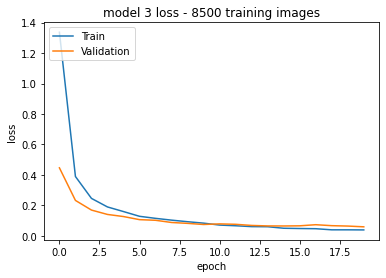

LOOP: 9000.0 training images
Epoch 1/20
45/45 - 1s - loss: 0.6376 - accuracy: 0.8213 - val_loss: 0.3166 - val_accuracy: 0.9129
Epoch 2/20
45/45 - 0s - loss: 0.2549 - accuracy: 0.9300 - val_loss: 0.2557 - val_accuracy: 0.9281
Epoch 3/20
45/45 - 0s - loss: 0.1897 - accuracy: 0.9494 - val_loss: 0.2300 - val_accuracy: 0.9349
Epoch 4/20
45/45 - 0s - loss: 0.1437 - accuracy: 0.9619 - val_loss: 0.2084 - val_accuracy: 0.9398
Epoch 5/20
45/45 - 0s - loss: 0.1135 - accuracy: 0.9714 - val_loss: 0.1864 - val_accuracy: 0.9440
Epoch 6/20
45/45 - 0s - loss: 0.0858 - accuracy: 0.9797 - val_loss: 0.1741 - val_accuracy: 0.9479
Epoch 7/20
45/45 - 0s - loss: 0.0677 - accuracy: 0.9853 - val_loss: 0.1804 - val_accuracy: 0.9462
Epoch 8/20
45/45 - 0s - loss: 0.0550 - accuracy: 0.9882 - val_loss: 0.1673 - val_accuracy: 0.9498
Epoch 9/20
45/45 - 0s - loss: 0.0432 - accuracy: 0.9921 - val_loss: 0.1675 - val_accuracy: 0.9494
Epoch 10/20
45/45 - 0s - loss: 0.0359 - accuracy: 0.9940 - val_loss: 0.1584 - val_accurac

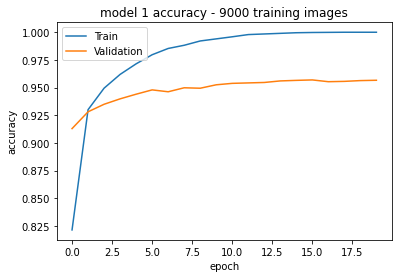

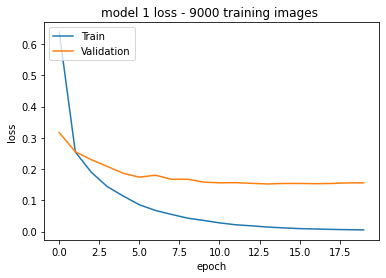

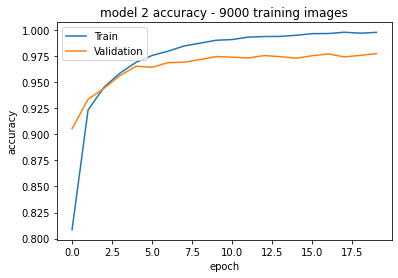

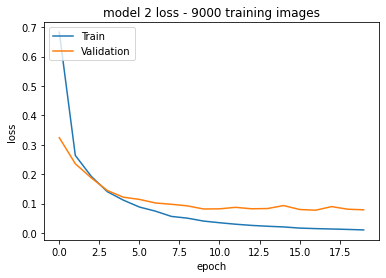

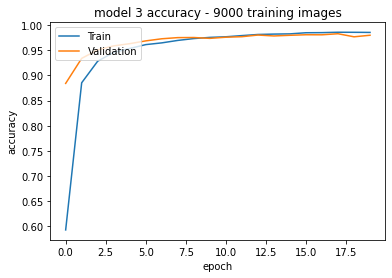

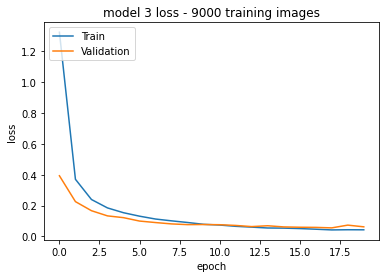

LOOP: 9500.0 training images
Epoch 1/20
48/48 - 1s - loss: 0.6164 - accuracy: 0.8300 - val_loss: 0.3138 - val_accuracy: 0.9135
Epoch 2/20
48/48 - 0s - loss: 0.2518 - accuracy: 0.9303 - val_loss: 0.2630 - val_accuracy: 0.9229
Epoch 3/20
48/48 - 0s - loss: 0.1866 - accuracy: 0.9494 - val_loss: 0.2162 - val_accuracy: 0.9362
Epoch 4/20
48/48 - 0s - loss: 0.1451 - accuracy: 0.9594 - val_loss: 0.1994 - val_accuracy: 0.9398
Epoch 5/20
48/48 - 0s - loss: 0.1103 - accuracy: 0.9723 - val_loss: 0.1854 - val_accuracy: 0.9440
Epoch 6/20
48/48 - 0s - loss: 0.0851 - accuracy: 0.9803 - val_loss: 0.1760 - val_accuracy: 0.9477
Epoch 7/20
48/48 - 0s - loss: 0.0665 - accuracy: 0.9854 - val_loss: 0.1670 - val_accuracy: 0.9507
Epoch 8/20
48/48 - 0s - loss: 0.0545 - accuracy: 0.9880 - val_loss: 0.1668 - val_accuracy: 0.9501
Epoch 9/20
48/48 - 0s - loss: 0.0429 - accuracy: 0.9921 - val_loss: 0.1626 - val_accuracy: 0.9529
Epoch 10/20
48/48 - 0s - loss: 0.0356 - accuracy: 0.9935 - val_loss: 0.1542 - val_accurac

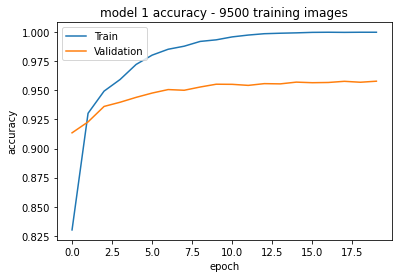

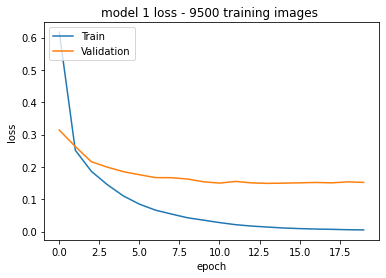

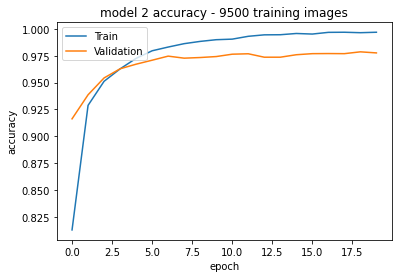

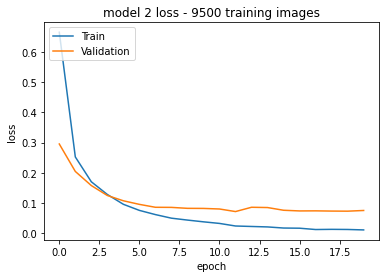

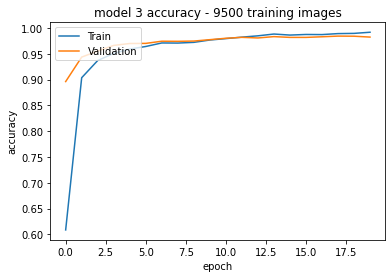

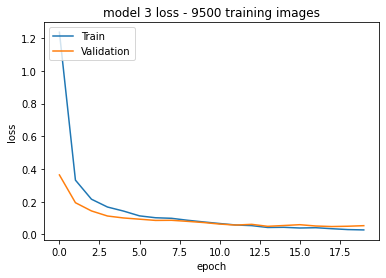

LOOP: 10000.0 training images
Epoch 1/20
50/50 - 1s - loss: 0.6247 - accuracy: 0.8271 - val_loss: 0.3149 - val_accuracy: 0.9104
Epoch 2/20
50/50 - 0s - loss: 0.2459 - accuracy: 0.9309 - val_loss: 0.2431 - val_accuracy: 0.9286
Epoch 3/20
50/50 - 0s - loss: 0.1818 - accuracy: 0.9503 - val_loss: 0.2302 - val_accuracy: 0.9317
Epoch 4/20
50/50 - 0s - loss: 0.1350 - accuracy: 0.9640 - val_loss: 0.1977 - val_accuracy: 0.9395
Epoch 5/20
50/50 - 0s - loss: 0.1054 - accuracy: 0.9724 - val_loss: 0.1773 - val_accuracy: 0.9462
Epoch 6/20
50/50 - 0s - loss: 0.0822 - accuracy: 0.9808 - val_loss: 0.1667 - val_accuracy: 0.9514
Epoch 7/20
50/50 - 0s - loss: 0.0624 - accuracy: 0.9860 - val_loss: 0.1609 - val_accuracy: 0.9511
Epoch 8/20
50/50 - 0s - loss: 0.0507 - accuracy: 0.9894 - val_loss: 0.1576 - val_accuracy: 0.9522
Epoch 9/20
50/50 - 0s - loss: 0.0425 - accuracy: 0.9920 - val_loss: 0.1625 - val_accuracy: 0.9521
Epoch 10/20
50/50 - 0s - loss: 0.0323 - accuracy: 0.9945 - val_loss: 0.1524 - val_accura

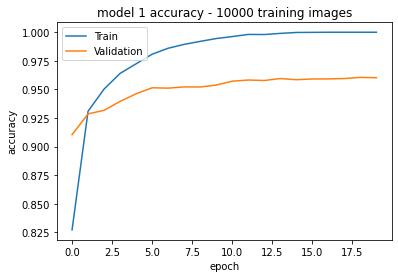

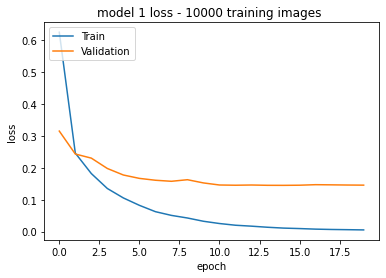

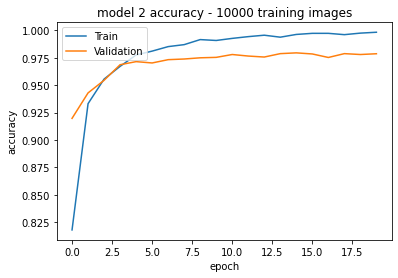

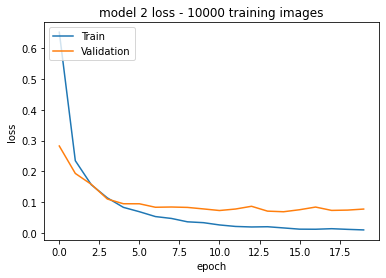

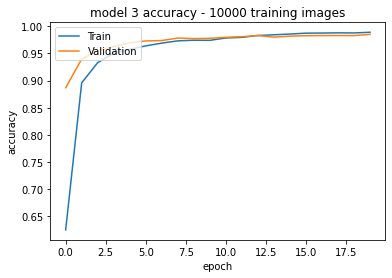

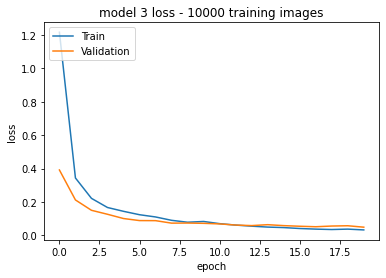

In [36]:
# creating a dictionary that will store all the interesting metrics about the experiment
# (including training time!)
summary_statistics = {
    'num_training_images': [],
    'val_accuracies_model1': [],
    'val_accuracies_model2': [],
    'val_accuracies_model3': [],
    'val_losses_model1': [],
    'val_losses_model2': [],
    'val_losses_model3': [],
    'train_accuracies_model1': [],
    'train_accuracies_model2': [],
    'train_accuracies_model3': [],
    'train_losses_model1': [],
    'train_losses_model2': [],
    'train_losses_model3': [],
    'training_times_model1': [],
    'training_times_model2': [],
    'training_times_model3': [],
}

for i in np.linspace(500,10000,20):
    print(f'LOOP: {i} training images')
    
    ## Storing data for later plotting
    summary_statistics['num_training_images'].append(i)
    
    i = int(i)
    # 1D Data for model 1
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    X_train = X_train.reshape((X_train.shape[0], total_pixels)).astype('float')
    X_test = X_test.reshape((X_test.shape[0], total_pixels)).astype('float')

    # normalizing
    X_train = X_train / 255
    X_test = X_test / 255

    # categories
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)

    # Sampling the 1D data
    X_train_sampled, y_train_sampled = X_train[:i], y_train[:i]

    # training model 1
    start = time.time()
    model1 = baseline_model()
    history1 = model1.fit(X_train_sampled, y_train_sampled, validation_data=(X_test, y_test), epochs=20, batch_size=200, verbose=2)
    stop = time.time()
    
    # storing results of model1
    summary_statistics['val_accuracies_model1'].append(history1.history['val_accuracy'])
    summary_statistics['val_losses_model1'].append(history1.history['val_loss'])
    summary_statistics['train_accuracies_model1'].append(history1.history['accuracy'])
    summary_statistics['train_losses_model1'].append(history1.history['loss'])
    summary_statistics['training_times_model1'].append(stop-start)
    
    # 2D Data for model 2
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # the arguments of reshape are data, length, width, color-filters (3 for rgb, 1 for greyscale)
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

    # normalizing
    X_train = X_train / 255
    X_test = X_test / 255

    # categories
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)

    X_train_sampled, y_train_sampled = X_train[:i], y_train[:i]

    # training model 2
    start = time.time()
    model2 = cnn_model()
    history2 = model2.fit(X_train_sampled, y_train_sampled, validation_data=(X_test, y_test), epochs=20, batch_size=200, verbose=2)
    stop = time.time()
    
    # storing results of model2
    summary_statistics['val_accuracies_model2'].append(history2.history['val_accuracy'])
    summary_statistics['val_losses_model2'].append(history2.history['val_loss'])
    summary_statistics['train_accuracies_model2'].append(history2.history['accuracy'])
    summary_statistics['train_losses_model2'].append(history2.history['loss'])
    summary_statistics['training_times_model2'].append(stop-start)
    
    # 2D Data for model 3
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # the arguments of reshape are data, length, width, color-filters (3 for rgb, 1 for greyscale)
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

    # normalizing
    X_train = X_train / 255
    X_test = X_test / 255

    # categories
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)

    X_train_sampled, y_train_sampled = X_train[:i], y_train[:i]

    # training model 3
    start = time.time()
    model3 = cnn_model2()
    history3 = model3.fit(X_train_sampled, y_train_sampled, validation_data=(X_test, y_test), epochs=20, batch_size=200)
    stop = time.time()
    
    # storing results of model3
    summary_statistics['val_accuracies_model3'].append(history3.history['val_accuracy'])
    summary_statistics['val_losses_model3'].append(history3.history['val_loss'])
    summary_statistics['train_accuracies_model3'].append(history3.history['accuracy'])
    summary_statistics['train_losses_model3'].append(history3.history['loss'])
    summary_statistics['training_times_model3'].append(stop-start)
    
    
    ##******** PLOTTING MODEL 1********
    

    # summarize history for accuracy
    plt.plot(history1.history['accuracy'])
    plt.plot(history1.history['val_accuracy'])
    plt.title(f"model 1 accuracy - {i} training images")
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history1.history['loss'])
    plt.plot(history1.history['val_loss'])
    plt.title(f"model 1 loss - {i} training images ")
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    ## PLOTTING MODEL 2

    # summarize history for accuracy
    plt.plot(history2.history['accuracy'])
    plt.plot(history2.history['val_accuracy'])
    plt.title(f'model 2 accuracy - {i} training images')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history2.history['loss'])
    plt.plot(history2.history['val_loss'])
    plt.title(f'model 2 loss - {i} training images')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    ## PLOTTING MODEL 3

    # summarize history for accuracy
    plt.plot(history3.history['accuracy'])
    plt.plot(history3.history['val_accuracy'])
    plt.title(f'model 3 accuracy - {i} training images')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history3.history['loss'])
    plt.plot(history3.history['val_loss'])
    plt.title(f'model 3 loss - {i} training images')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Training time vs # Training Images


In [37]:
summary_statistics.keys()

dict_keys(['num_training_images', 'val_accuracies_model1', 'val_accuracies_model2', 'val_accuracies_model3', 'val_losses_model1', 'val_losses_model2', 'val_losses_model3', 'train_accuracies_model1', 'train_accuracies_model2', 'train_accuracies_model3', 'train_losses_model1', 'train_losses_model2', 'train_losses_model3', 'training_times_model1', 'training_times_model2', 'training_times_model3'])

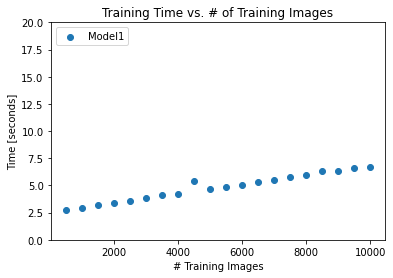

In [38]:
# training time of MODEL 1
plt.scatter(x=summary_statistics['num_training_images'],
         y=summary_statistics['training_times_model1'])
plt.title('Model 1 Training Time vs. # of Training Images')
plt.ylabel('Time [seconds]')
plt.xlabel('# Training Images')
plt.legend(['Model1', 'Model2', 'Model3'], loc='upper left')
plt.ylim([0, 20])
plt.show()

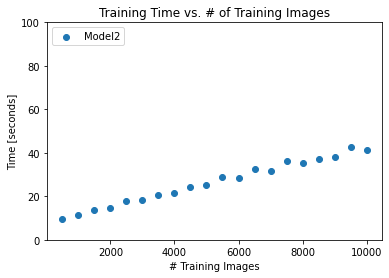

In [39]:
# plotting code for model 2 


# plt.scatter(x=summary_statistics['num_training_images'],y=summary_statistics['training_times_model2'])
# plt.title('Training Time vs. # of Training Images')
# plt.ylabel('Time [seconds]')
# plt.xlabel('# Training Images')
# plt.legend(['Model2'], loc='upper left')
# plt.ylim(0, 100)
# plt.show()

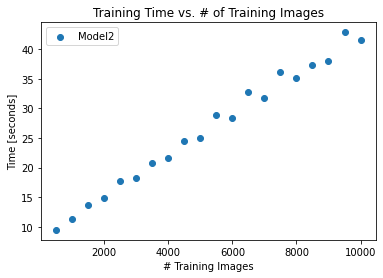

In [40]:
# training time of model 2
plt.scatter(x=summary_statistics['num_training_images'],
         y=summary_statistics['training_times_model2'])
plt.title('Model2 Training Time vs. # of Training Images')
plt.ylabel('Time [seconds]')
plt.xlabel('# Training Images')
plt.legend(['Model2'], loc='upper left')
# plt.ylim()
plt.show()

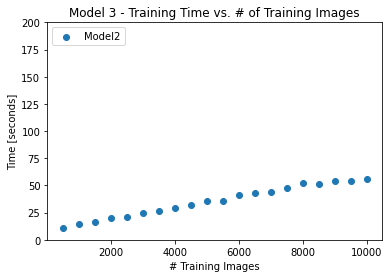

In [41]:
# training time of MODEL 3
plt.scatter(x=summary_statistics['num_training_images'],
         y=summary_statistics['training_times_model3'])
plt.title('Model 3 - Training Time vs. # of Training Images')
plt.ylabel('Time [seconds]')
plt.xlabel('# Training Images')
plt.legend(['Model 3'], loc='upper left')
# plt.ylim(0, 200)
plt.show()

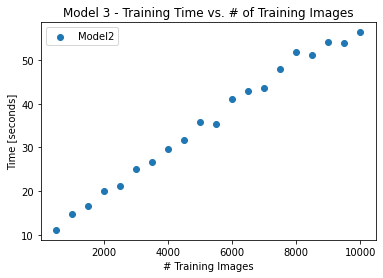

In [42]:
# Training time of all 3 Models, Combined

# model 1
plt.scatter(x=summary_statistics['num_training_images'],
         y=summary_statistics['training_times_model1'])

# model 2
plt.scatter(x=summary_statistics['num_training_images'],
         y=summary_statistics['training_times_model2'])

# model 3
plt.scatter(x=summary_statistics['num_training_images'],
         y=summary_statistics['training_times_model3'])



plt.title('Model 3 - Training Time vs. # of Training Images')
plt.ylabel('Time [seconds]')
plt.xlabel('# Training Images')
plt.legend(['Model 1', 'Model 2', 'Model 3'], loc='upper left')
# plt.ylim(0, 200)

# saving the chart to show the world :) 
plt.savefig("3modelstime_vs_trainingimgs.pdf", format="pdf", bbox_inches="tight")


plt.show()

# Accuracy vs # Training Images

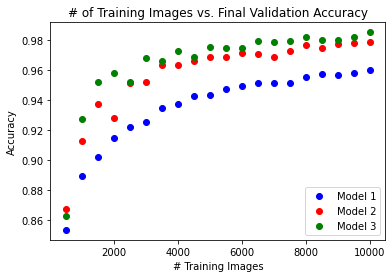

In [43]:
# Plotting final accuracies of each model

plt.scatter(x=summary_statistics['num_training_images'],
            y=[i[-1] for i in summary_statistics['val_accuracies_model1']], 
            c='b', marker='o', label='Model 1')

plt.scatter(summary_statistics['num_training_images'],
            y=[i[-1] for i in summary_statistics['val_accuracies_model2']], 
            c='r', marker='o', label='Model 2')

plt.scatter(summary_statistics['num_training_images'],
            y=[i[-1] for i in summary_statistics['val_accuracies_model3']], 
            c='g', marker='o', label='Model 3')

plt.title('# of Training Images vs. Final Validation (Test) Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('# Training Images')

plt.legend(loc='lower right')

# saving pdf
plt.savefig("3models_valacc_vs_trainingimgs.pdf", format="pdf", bbox_inches="tight")

plt.show()

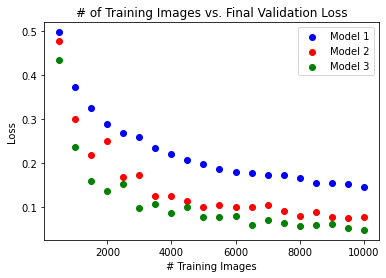

In [44]:
# Plotting final losses of each model

plt.scatter(x=summary_statistics['num_training_images'],
            y=[i[-1] for i in summary_statistics['val_losses_model1']], 
            c='b', marker='o', label='Model 1')

plt.scatter(summary_statistics['num_training_images'],
            y=[i[-1] for i in summary_statistics['val_losses_model2']], 
            c='r', marker='o', label='Model 2')

plt.scatter(summary_statistics['num_training_images'],
            y=[i[-1] for i in summary_statistics['val_losses_model3']], 
            c='g', marker='o', label='Model 3')

plt.title('# of Training Images vs. Final Validation (Test) Loss')
plt.ylabel('Loss')
plt.xlabel('# Training Images')

plt.legend(loc='upper right')
plt.show()

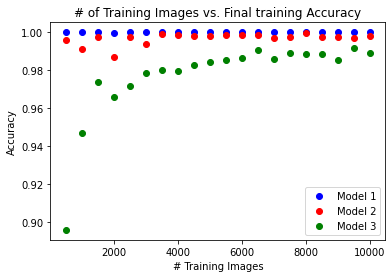

In [45]:
# Plotting final Training Accuracies of each model

plt.scatter(x=summary_statistics['num_training_images'],
            y=[i[-1] for i in summary_statistics['train_accuracies_model1']], 
            c='b', marker='o', label='Model 1')

plt.scatter(summary_statistics['num_training_images'],
            y=[i[-1] for i in summary_statistics['train_accuracies_model2']], 
            c='r', marker='o', label='Model 2')

plt.scatter(summary_statistics['num_training_images'],
            y=[i[-1] for i in summary_statistics['train_accuracies_model3']], 
            c='g', marker='o', label='Model 3')

plt.title('# of Training Images vs. Final training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('# Training Images')

# saving pdf
plt.savefig("3models_trainacc_vs_trainingimgs.pdf", format="pdf", bbox_inches="tight")

plt.legend(loc='lower right')
plt.show()

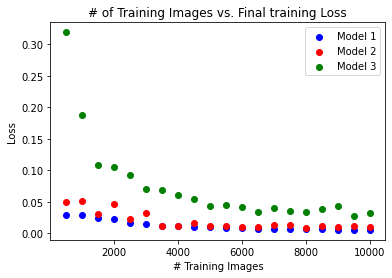

In [46]:
# Plotting final Training Loss of each model

plt.scatter(x=summary_statistics['num_training_images'],
            y=[i[-1] for i in summary_statistics['train_losses_model1']], 
            c='b', marker='o', label='Model 1')

plt.scatter(summary_statistics['num_training_images'],
            y=[i[-1] for i in summary_statistics['train_losses_model2']], 
            c='r', marker='o', label='Model 2')

plt.scatter(summary_statistics['num_training_images'],
            y=[i[-1] for i in summary_statistics['train_losses_model3']], 
            c='g', marker='o', label='Model 3')

plt.title('# of Training Images vs. Final training Loss')
plt.ylabel('Loss')
plt.xlabel('# Training Images')

plt.legend(loc='upper right')
plt.show()